In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

#drive_path = "/content/drive/MyDrive/Software Engineering/EDIT/Datasets/"
drive_path = "/content/drive/MyDrive/Edit DSBA/Exploratory/Fire/"


Mounted at /content/drive


## Load dataset

In [3]:
df = pd.read_csv(drive_path + "fire.csv")

### Check shape of dataset

In [4]:
df.shape

(6302, 6)

### Check first 5 rows of dataset

In [5]:
df.head()

year country        state month  number      date
0  2002  Brazil  Mato Grosso   Jun   517.0  1/1/2002
1  2005  Brazil        Bahia   Aug   948.0  1/1/2005
2  2010  Brazil     Amazonas   Apr    11.0  1/1/2010
3  2014  Brazil     Maranhao   Apr    78.0  1/1/2014
4  2001  Brazil      Sergipe   Mar     1.0  1/1/2001

### Check last 5 rows of dataset

In [6]:
df.tail()

year country      state month  number      date
6297  2015  Brazil   Maranhao   Sep  6423.0  1/1/2015
6298  2006  Brazil  Sao Paulo   Jul   245.0  1/1/2006
6299  2012  Brazil       Acre   Sep  1996.0  1/1/2012
6300  2006  Brazil  Sao Paulo   Oct   153.0  1/1/2006
6301  2013  Brazil   Amazonas   Aug  1276.0  1/1/2013

## Data Preparation

### Simplifying Features

In [7]:
df.country.describe()

count       6302
unique         1
top       Brazil
freq        6302
Name: country, dtype: object

After exploring the data, we have determined that the column `country` should be dropped.

In [8]:
df.drop(['country'], axis=1, inplace=True)

Check if feature `country` was deleted.

In [9]:
df.head()

year        state month  number      date
0  2002  Mato Grosso   Jun   517.0  1/1/2002
1  2005        Bahia   Aug   948.0  1/1/2005
2  2010     Amazonas   Apr    11.0  1/1/2010
3  2014     Maranhao   Apr    78.0  1/1/2014
4  2001      Sergipe   Mar     1.0  1/1/2001

It seems like the `date` feature in the dataset is not informative since it only consists of day and month, which are already provided in separate columns along with the year.

In [10]:
# Check if all years in the 'date' column are the same as in the 'year' column
all_years_match = (df['year'] == df['date'].str.split('/').str[-1].astype(int)).all()

if all_years_match:
    print("All the years are the same as in the date column.")
else:
    print("Not all the years are the same as in the date column.")

All the years are the same as in the date column.


The year in the date column is the same for all the entries.

In [11]:
# Check if all dates have day 1 and month 1
all_dates_match = (df['date'].str.split('/').str[0] == '1') & (df['date'].str.split('/').str[1] == '1')

if all_dates_match.all():
    print("All dates have a day of 1 and a month of 1.")
else:
    print("Not all dates have a day of 1 and a month of 1.")

All dates have a day of 1 and a month of 1.


It can be stated that all dates have a day value of 1 and a month value of 1.

The year matches the `year` column, and the day and month are consistent throughout the data, so we can safely remove the `date` column.

In [12]:
df.drop(['date'], axis=1, inplace=True)

Check our updated dataset.

In [13]:
df.head()

year        state month  number
0  2002  Mato Grosso   Jun   517.0
1  2005        Bahia   Aug   948.0
2  2010     Amazonas   Apr    11.0
3  2014     Maranhao   Apr    78.0
4  2001      Sergipe   Mar     1.0

### Missing Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6302 non-null   int64  
 1   state   6302 non-null   object 
 2   month   6302 non-null   object 
 3   number  6290 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 197.1+ KB


In [15]:
# Check for null values in the dataset and sort them in descending order
df.isnull().sum().sort_values(ascending=False)

number    12
year       0
state      0
month      0
dtype: int64

In [16]:
df.loc[df['number'].isnull()]

year         state month  number
20    2011  Minas Gerais   Nov     NaN
708   2011  Minas Gerais   Oct     NaN
982   2011  Minas Gerais   Dez     NaN
1324  2011  Minas Gerais   Jul     NaN
2695  2011  Minas Gerais   Feb     NaN
2718  2011  Minas Gerais   Mar     NaN
3670  2011  Minas Gerais   Jan     NaN
4510  2011  Minas Gerais   Jun     NaN
5939  2011  Minas Gerais   Apr     NaN
5950  2011  Minas Gerais   Aug     NaN
5954  2011  Minas Gerais   Sep     NaN
6183  2011  Minas Gerais   May     NaN

In [17]:
# Check for missing values in the dataset and sort them in descending order
df.isna().sum().sort_values(ascending=False)

number    12
year       0
state      0
month      0
dtype: int64

In [18]:
df.loc[df['number'].isna()]

year         state month  number
20    2011  Minas Gerais   Nov     NaN
708   2011  Minas Gerais   Oct     NaN
982   2011  Minas Gerais   Dez     NaN
1324  2011  Minas Gerais   Jul     NaN
2695  2011  Minas Gerais   Feb     NaN
2718  2011  Minas Gerais   Mar     NaN
3670  2011  Minas Gerais   Jan     NaN
4510  2011  Minas Gerais   Jun     NaN
5939  2011  Minas Gerais   Apr     NaN
5950  2011  Minas Gerais   Aug     NaN
5954  2011  Minas Gerais   Sep     NaN
6183  2011  Minas Gerais   May     NaN

The dataset has 12 Null/NaN values for a complete full year for the same state.
We will fill this values with the mean values of the same state

In [19]:
# Filter rows with the state "Minas Gerais"
minas_gerais_data = df[df["state"] == "Minas Gerais"]

# Exclude NaN values and calculate the mean number of fires
mean_fires_by_month = (minas_gerais_data.dropna(subset=["number"]).groupby("month")["number"].mean())

# Print the mean number of fires for each month in Minas Gerais (excluding NaN values)
print(mean_fires_by_month)

# Replace NaN values in the 'number' column with mean values based on the month
df["number"] = df.apply(
    lambda row: math.ceil(mean_fires_by_month[row["month"]])
    if pd.isna(row["number"])
    else row["number"],
    axis=1,
)
# Filter data for state "Minas Gerais" and year 2011
minas_gerais_2011 = df[
    (df["state"] == "Minas Gerais") & (df["year"] == 2011)
].sort_values(by="month")

# Print the filtered data
print("\n", minas_gerais_2011)

month
Apr      88.157895
Aug    1382.263158
Dez     108.000000
Feb      89.315789
Jan      66.736842
Jul     481.736842
Jun     188.894737
Mar      80.421053
May     109.105263
Nov     408.105263
Oct    2600.052632
Sep    2694.473684
Name: number, dtype: float64

       year         state month  number
5939  2011  Minas Gerais   Apr    89.0
5950  2011  Minas Gerais   Aug  1383.0
982   2011  Minas Gerais   Dez   108.0
2695  2011  Minas Gerais   Feb    90.0
3670  2011  Minas Gerais   Jan    67.0
1324  2011  Minas Gerais   Jul   482.0
4510  2011  Minas Gerais   Jun   189.0
2718  2011  Minas Gerais   Mar    81.0
6183  2011  Minas Gerais   May   110.0
20    2011  Minas Gerais   Nov   409.0
708   2011  Minas Gerais   Oct  2601.0
5954  2011  Minas Gerais   Sep  2695.0


In [20]:
df.isnull().sum().sort_values(ascending=False)

year      0
state     0
month     0
number    0
dtype: int64

Now we have no missing data

In [21]:
df.sort_values('number')

year             state month    number
5161  1998             Amapa   Feb       0.0
3394  2000  Distrito Federal   Jan       0.0
4485  2005             Goias   Dez       0.0
3396  2001               Rio   Jan       0.0
1723  1998           Sergipe   Feb       0.0
...    ...               ...   ...       ...
2795  2017       Mato Grosso   Sep   23945.0
3614  2004       Mato Grosso   Sep   24994.0
2182  2017              Para   Sep   25004.0
1773  2007       Mato Grosso   Sep   25963.0
5322  2010           Alagoas   Jan  325000.0

[6302 rows x 4 columns]

### Outliers

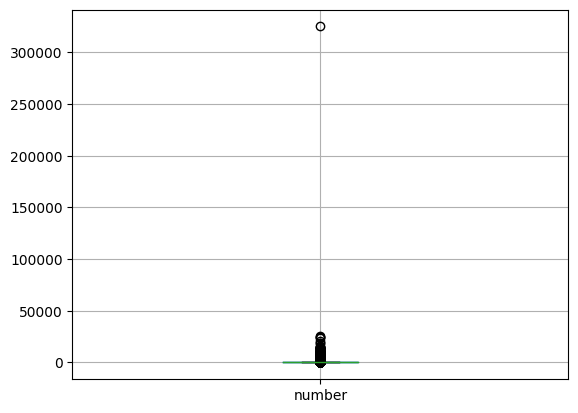

In [22]:
df.boxplot('number')
plt.show()

After analyzing the boxplot, it is apparent that there is a value that stands out, indicating that there are more than 300000 fires.

In [23]:
df.number.describe()
# max = 325000

count      6302.000000
mean        584.572358
std        4378.612293
min           0.000000
25%           8.000000
50%          55.000000
75%         278.000000
max      325000.000000
Name: number, dtype: float64

In this situation, since the value is to high when compared to the others, we'll remove the entire row.

In [24]:
df[df['number'] == 325000]

year    state month    number
5322  2010  Alagoas   Jan  325000.0

The Alagoas region experienced an odd number of fires in January 2010. We will investigate fire occurrences in the preceding and subsequent years.

In [25]:
df[(df.state == "Alagoas") & (df.month == "Jan")]

year    state month    number
61    2005  Alagoas   Jan      83.0
778   1999  Alagoas   Jan      58.0
1071  2014  Alagoas   Jan      54.0
1469  2002  Alagoas   Jan      12.0
1497  2017  Alagoas   Jan      38.0
1576  2004  Alagoas   Jan       9.0
1662  2003  Alagoas   Jan     150.0
1997  2011  Alagoas   Jan      41.0
2239  2009  Alagoas   Jan     104.0
2882  2008  Alagoas   Jan      55.0
2950  2007  Alagoas   Jan      33.0
3383  2001  Alagoas   Jan       5.0
4064  2015  Alagoas   Jan      81.0
4108  2016  Alagoas   Jan      24.0
4135  2000  Alagoas   Jan      11.0
4460  2017  Alagoas   Jan      38.0
4703  1998  Alagoas   Jan       0.0
5322  2010  Alagoas   Jan  325000.0
5974  2013  Alagoas   Jan      49.0
6011  2012  Alagoas   Jan      36.0
6074  2006  Alagoas   Jan      29.0

Since the number of registered fires 325000 is an extreme outlier, it is likely a data entry error and we will replace the value for Alagoas in January 2010 with the average of Alagoas in January for all other years.

In [26]:
# Filter the data for Alagoas in January for all years except 2010
alagoas_january_data = df[(df['state'] == 'Alagoas') & (df['month'] == 'Jan') & (df['year'] != 2010)]

# Calculate the average number of fires for Alagoas in January
average_fires = alagoas_january_data['number'].mean()

# Replace the value of 325,000 with the calculated average for 2010
df.loc[(df['state'] == 'Alagoas') & (df['month'] == 'Jan') & (df['year'] == 2010), 'number'] = math.ceil(average_fires)

In [27]:
df[(df.state == "Alagoas") & (df.month == "Jan") & (df.year == 2010)]

year    state month  number
5322  2010  Alagoas   Jan    46.0

In [28]:
df.number.describe()

count     6302.000000
mean       533.008727
std       1570.563417
min          0.000000
25%          8.000000
50%         55.000000
75%        278.000000
max      25963.000000
Name: number, dtype: float64

Check our new boxplot

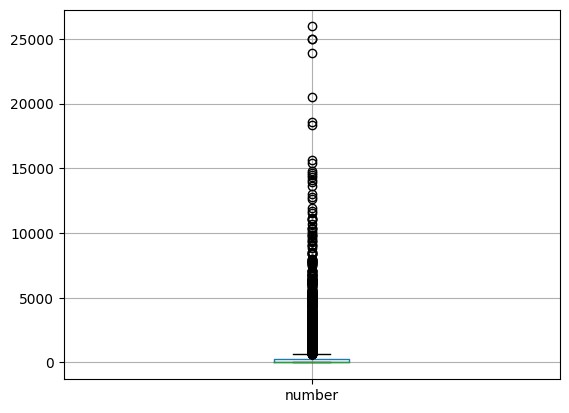

In [29]:
df.boxplot('number')
plt.show()

As we analyze the number of fires in different states, the graph above does not provide real insight. We will divide the information by state.

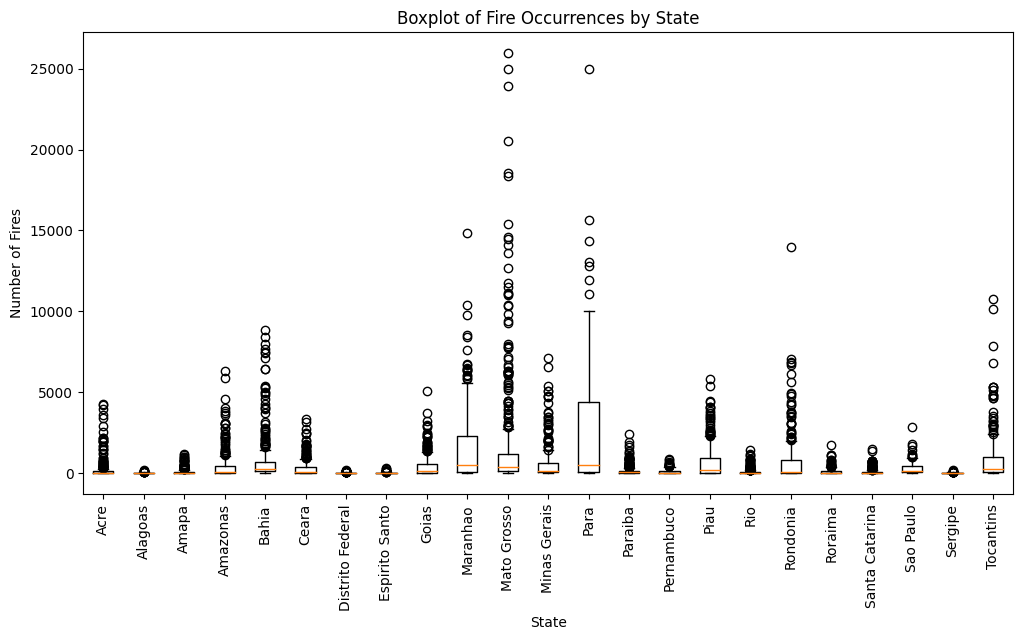

In [30]:
# Group the data by state
grouped = df.groupby('state')

# Create a list of DataFrames, one for each state
data_by_state = [group[1]['number'] for group in grouped]

# Create a list of state names
state_names = [group[0] for group in grouped]

# Create a boxplot for each state
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.boxplot(data_by_state, labels=state_names)
plt.title('Boxplot of Fire Occurrences by State')
plt.xlabel('State')
plt.ylabel('Number of Fires')
plt.xticks(rotation=90)  # Rotate state names for better readability

# Show the boxplots
plt.show()

We have gained better insights into the data, but we are currently only examining the total number of fires per state for the entire year. We are not taking into account the impact of seasonal changes on the frequency of fires. Therefore, we will refine our analysis by splitting the data by month to gain a more accurate understanding of the patterns of fire occurrence.

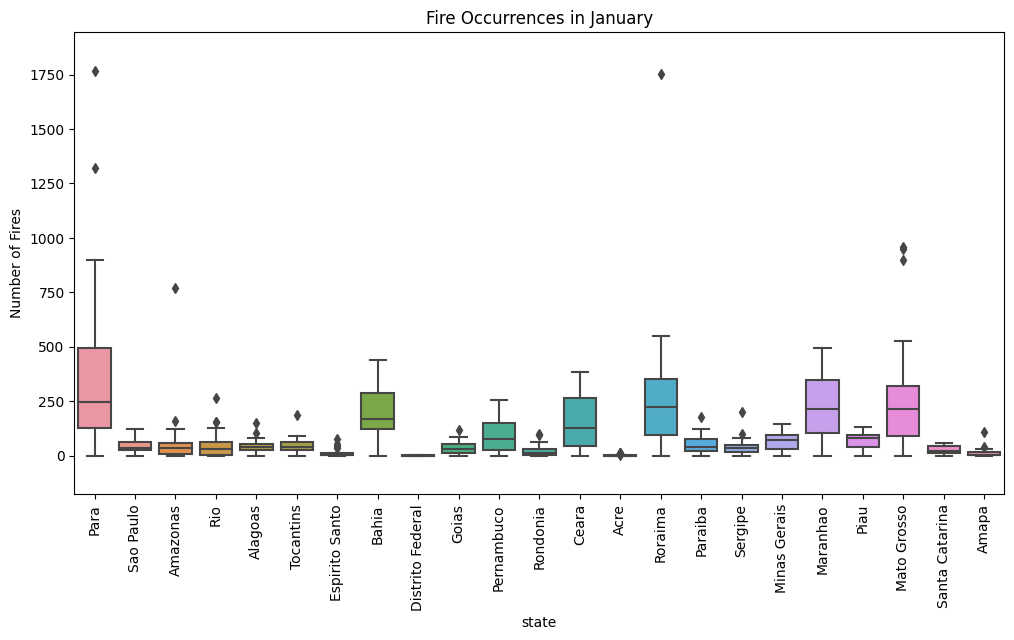

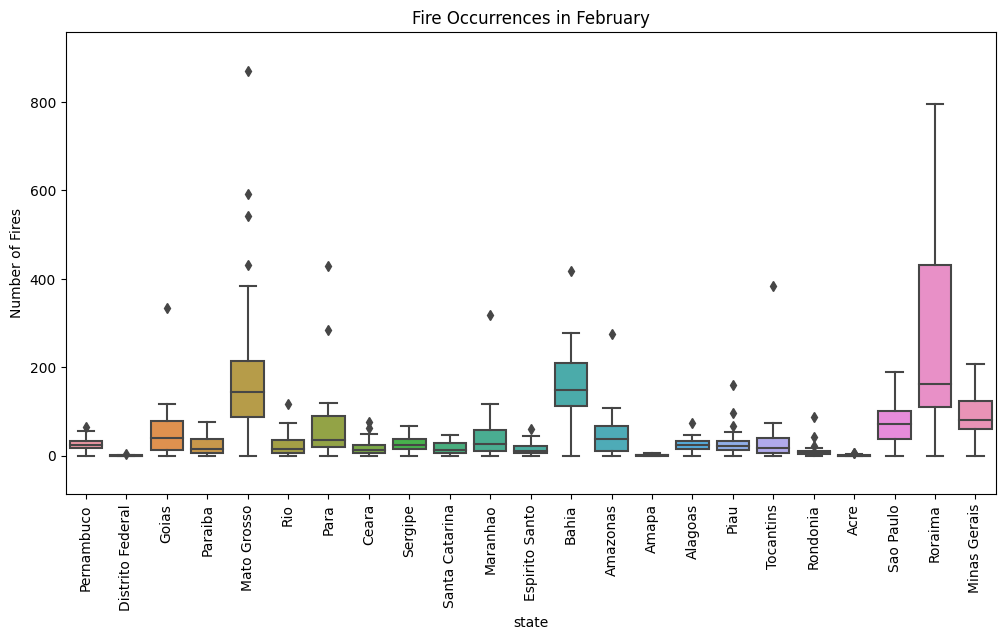

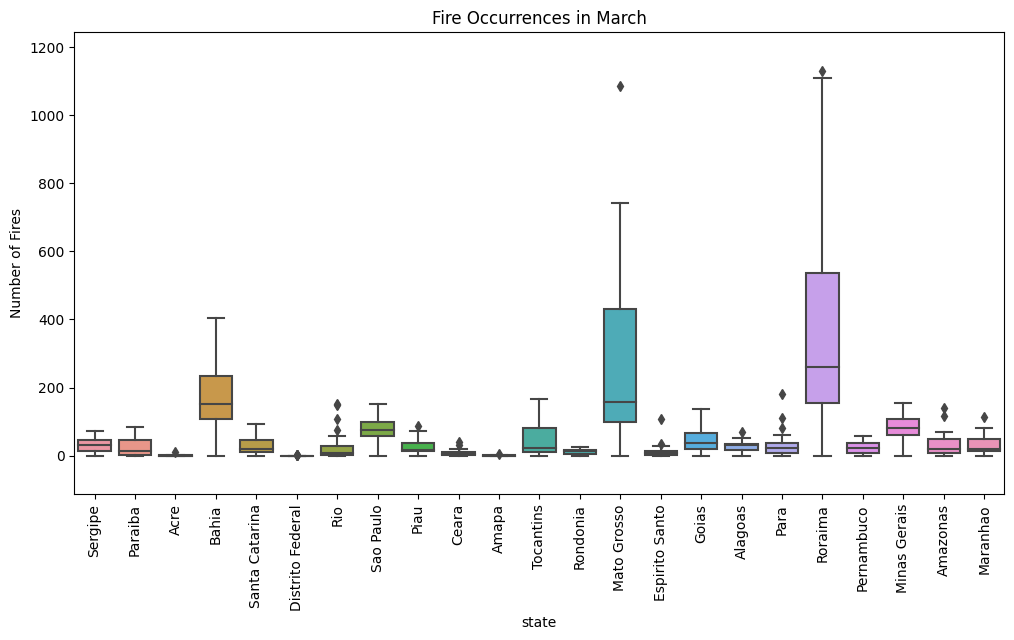

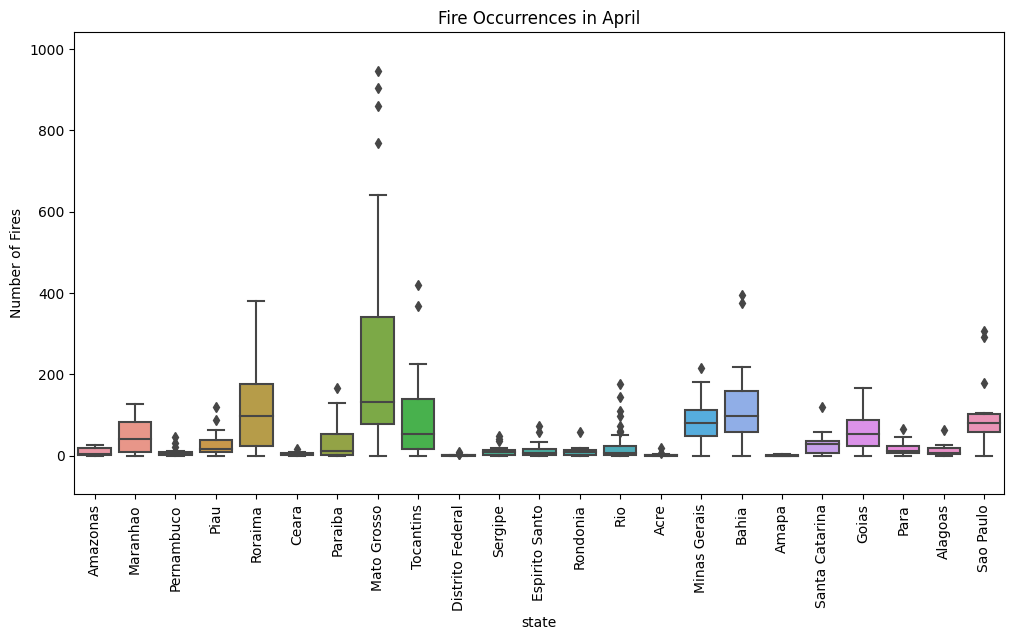

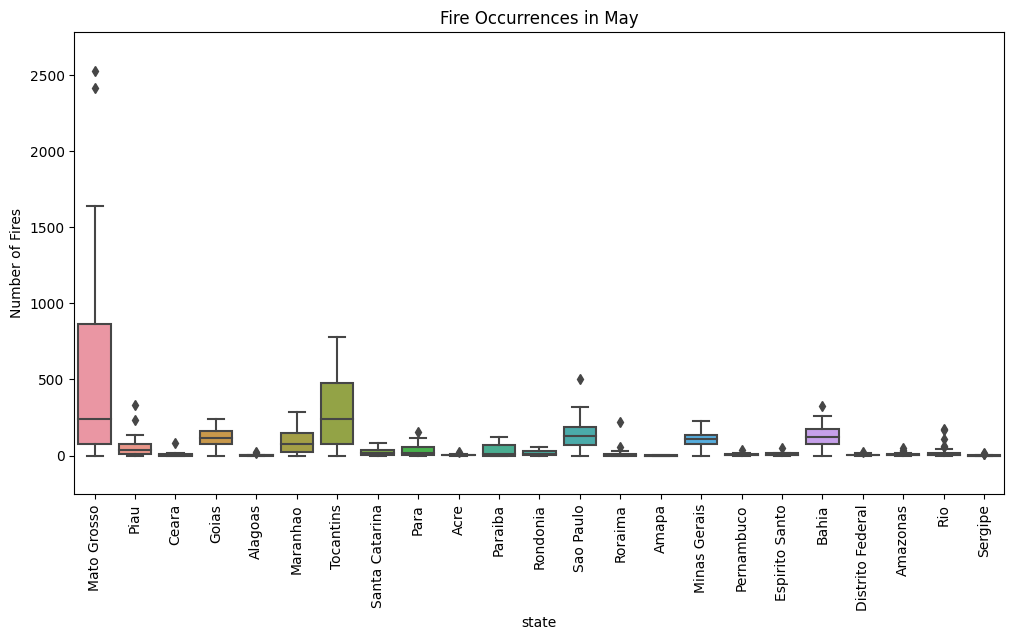

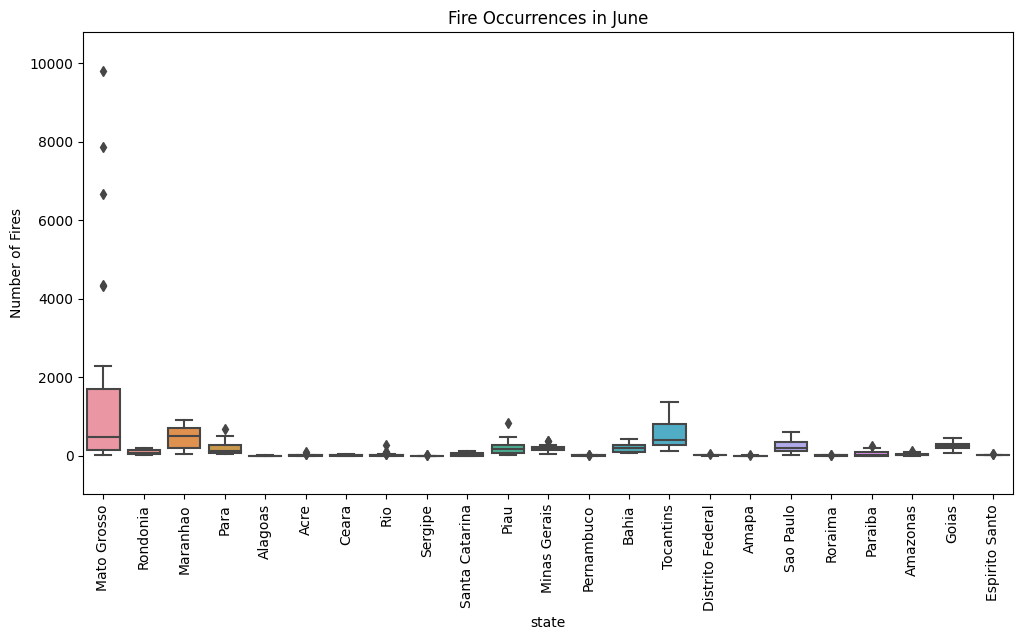

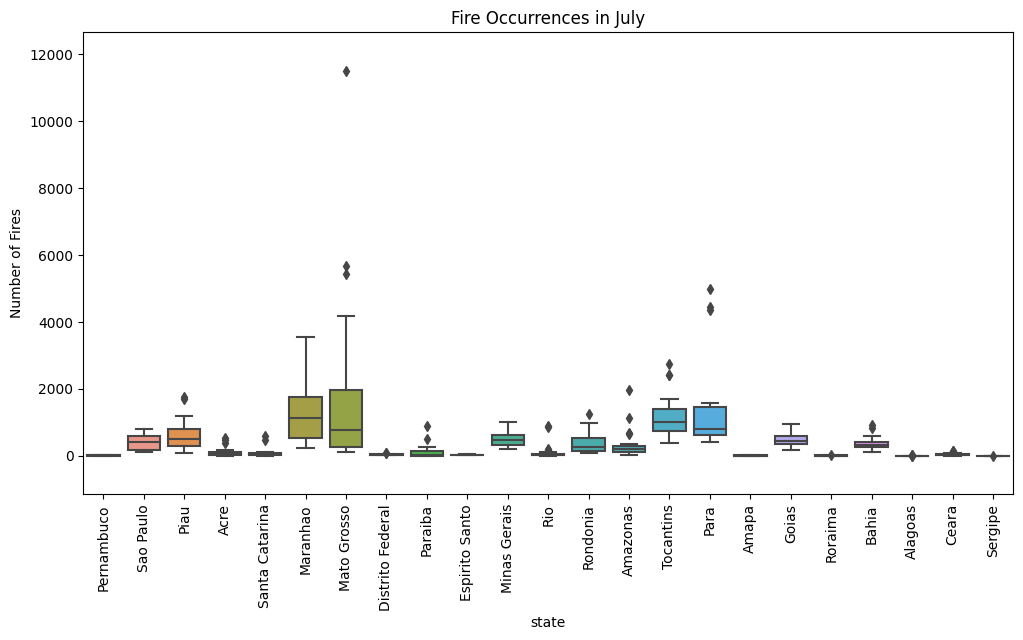

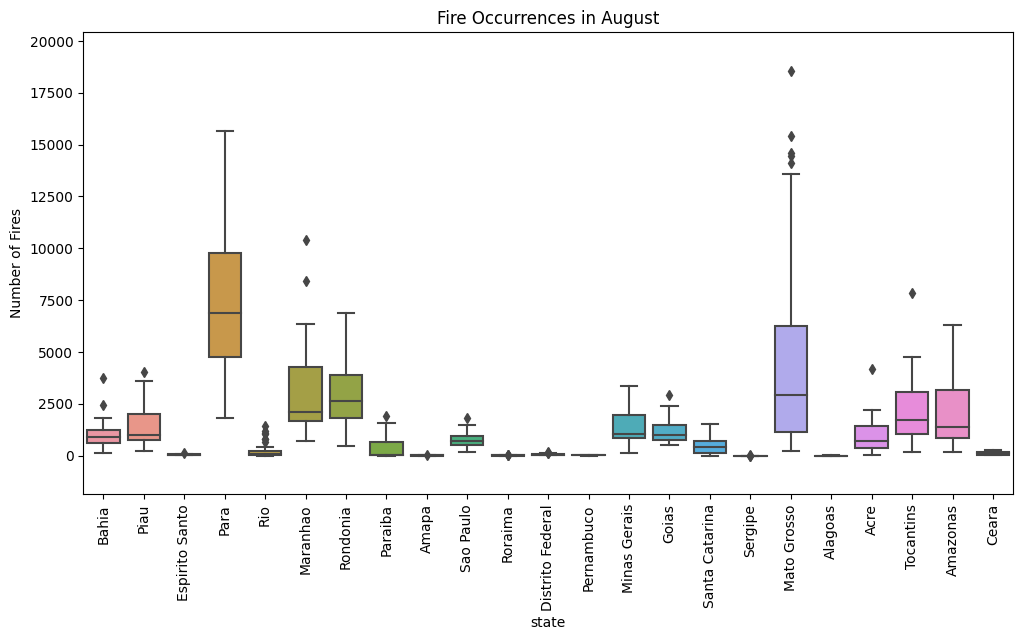

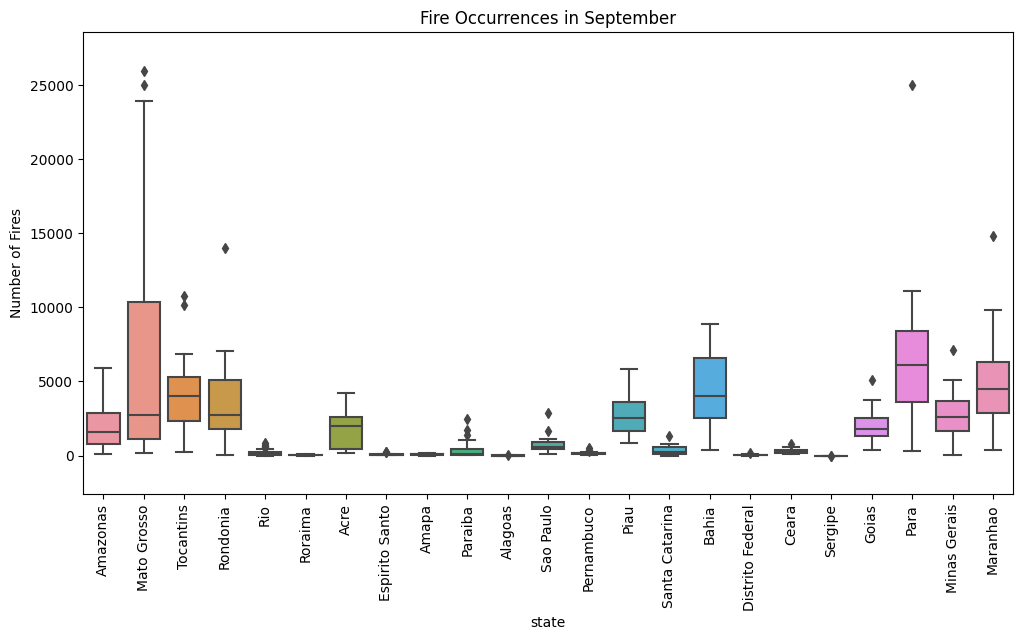

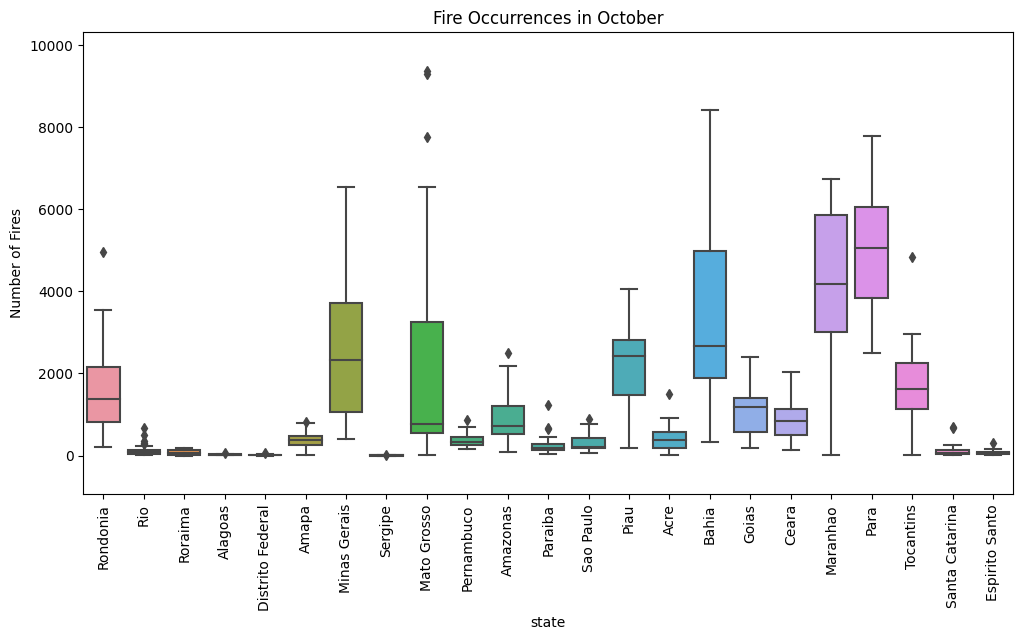

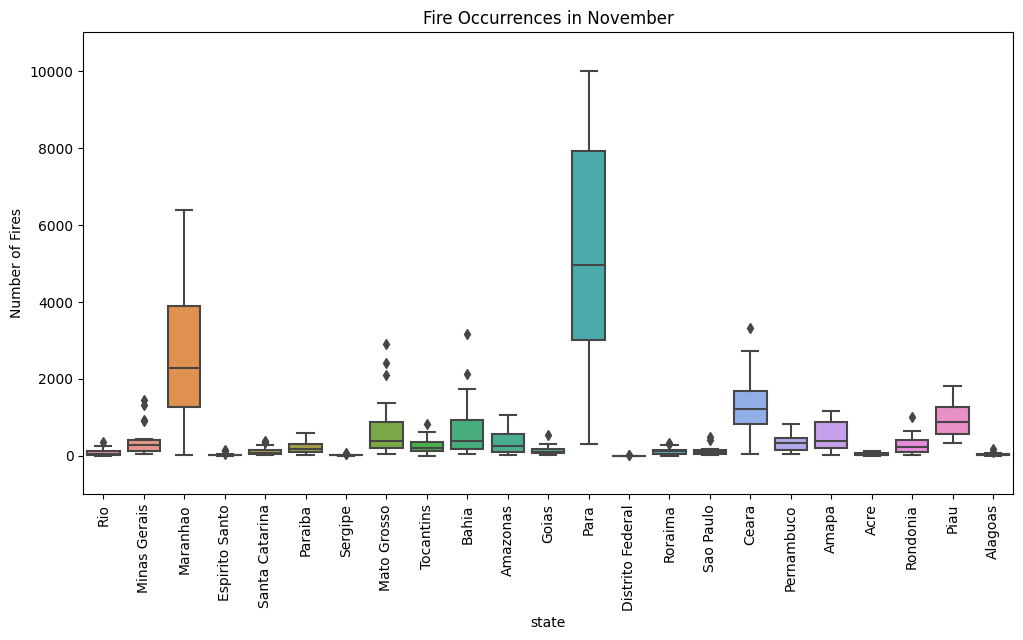

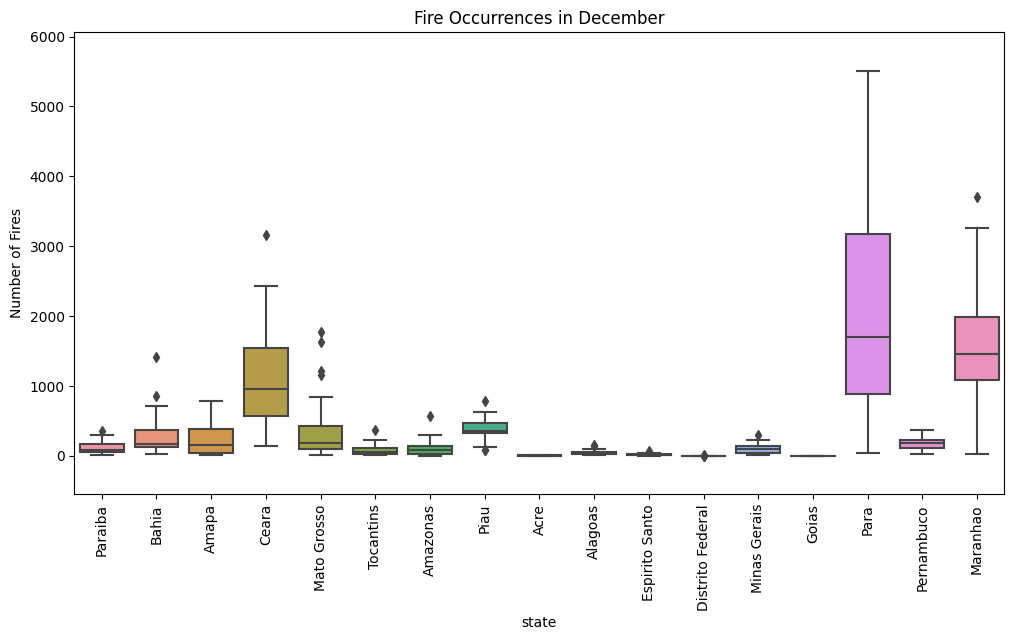

In [31]:
# Create a list of month names
month_names = {
    "Jan": "January",
    "Feb": "February",
    "Mar": "March",
    "Apr": "April",
    "May": "May",
    "Jun": "June",
    "Jul": "July",
    "Aug": "August",
    "Sep": "September",
    "Oct": "October",
    "Nov": "November",
    "Dez": "December",
}

# Loop through each month and create an independent figure with a boxplot
for month, name in month_names.items():
    # Filter the data for the current month
    month_data = df[df["month"] == month]

    # Create a new figure for the current month
    plt.figure(figsize=(12, 6))

    # Create a boxplot for the current month with vertical state names
    sns.boxplot(data=month_data, x="state", y="number")

    # Set the title for the current figure
    plt.title(f"Fire Occurrences in {name}")

    # Rotate state names on the x-axis
    plt.xticks(rotation=90)

    # Set y-axis label
    plt.ylabel("Number of Fires")

    # Dynamically adjust y-axis limits based on the data for the current month
    data_min = month_data["number"].min()
    data_max = month_data["number"].max()

    # Check if limits are finite, and if not, set them to a default range
    if np.isfinite(data_min) and np.isfinite(data_max):
        y_margin = 0.1 * (data_max - data_min)  # Add a 10% margin
        plt.ylim(data_min - y_margin, data_max + y_margin)
    else:
        plt.ylim(0, 500)  # Default range if data is not finite

    # Show the boxplot for the current month
    plt.show()

We can now clearly see the outliers for each state in each month.

In [32]:
# Function to detect outliers using IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Create a dictionary to store the outliers for each state and month
outliers_dict = {}

# Create a dictionary to store the total number of observations for each state and month
total_observations_dict = {}

# Group the data by 'state' and 'month'
grouped = df.groupby(['state', 'month'])

# Iterate through each group (state and month)
for group, group_data in grouped:
    state, month = group
    outliers = detect_outliers(group_data['number'])
    outliers_dict[(state, month)] = group_data[outliers]
    total_observations_dict[(state, month)] = len(group_data)

# Print the outliers and calculate the percentage of outliers
for key, outliers in outliers_dict.items():
    state, month = key
    total_observations = total_observations_dict[key]
    percentage_outliers = (len(outliers) / total_observations) * 100
    if not outliers.empty:
        print(f"Outliers in {state} for {month} ({percentage_outliers:.2f}% outliers):\n{outliers}\n")
    else:
        print(f"No outliers in {state} for {month} ({percentage_outliers:.2f}% outliers)\n")

Outliers in Acre for Apr (10.00% outliers):
      year state month  number
273   2013  Acre   Apr    19.0
1132  2014  Acre   Apr     7.0

Outliers in Acre for Aug (5.00% outliers):
      year state month  number
3869  2005  Acre   Aug  4198.0

No outliers in Acre for Dez (0.00% outliers)

Outliers in Acre for Feb (10.00% outliers):
      year state month  number
2284  2007  Acre   Feb     5.0
2749  2016  Acre   Feb     5.0

Outliers in Acre for Jan (20.00% outliers):
      year state month  number
630   2016  Acre   Jan    12.0
2114  2005  Acre   Jan    12.0
2747  2003  Acre   Jan    10.0
3534  2006  Acre   Jan     4.0

Outliers in Acre for Jul (15.00% outliers):
      year state month  number
1302  2016  Acre   Jul   533.0
2152  2017  Acre   Jul   457.0
2819  2005  Acre   Jul   368.0

Outliers in Acre for Jun (15.00% outliers):
      year state month  number
455   2017  Acre   Jun    45.0
5082  2015  Acre   Jun    40.0
5250  2016  Acre   Jun    87.0

Outliers in Acre for Mar (5.00% ou

**NOTE:** The remaining outliers are not extreme values. We are not able to conclude if the values are incorrect, therefore we decided to keep them.

### Duplicates

In [33]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 32


In [34]:
duplicates = df[df.duplicated(keep=False)]

if not duplicates.empty:
    print("Duplicate rows found:")

    # Create a dictionary to group the duplicates by a unique key
    grouped_duplicates = {}
    for index, row in duplicates.iterrows():
        row_key = tuple(row)
        if row_key not in grouped_duplicates:
            grouped_duplicates[row_key] = [index]
        else:
            grouped_duplicates[row_key].append(index)

    # Print the grouped duplicates
    for key, indices in grouped_duplicates.items():
        print("-" * 40)
        print("Duplicate Rows:")
        for index in indices:
            print(df.loc[index])
else:
    print("No duplicate rows found.")

Duplicate rows found:
----------------------------------------
Duplicate Rows:
year         1998
state     Paraiba
month         Mar
number        0.0
Name: 48, dtype: object
year         1998
state     Paraiba
month         Mar
number        0.0
Name: 4126, dtype: object
----------------------------------------
Duplicate Rows:
year      1998
state      Rio
month      Apr
number     0.0
Name: 242, dtype: object
year      1998
state      Rio
month      Apr
number     0.0
Name: 2358, dtype: object
year      1998
state      Rio
month      Apr
number     0.0
Name: 3985, dtype: object
----------------------------------------
Duplicate Rows:
year      1998
state      Rio
month      Mar
number     0.0
Name: 251, dtype: object
year      1998
state      Rio
month      Mar
number     0.0
Name: 3758, dtype: object
year      1998
state      Rio
month      Mar
number     0.0
Name: 5333, dtype: object
----------------------------------------
Duplicate Rows:
year             1998
state     Mato Gross

Now we can understand that we have 32 duplicates. Some of them have 0 fires registered. We have assumed in this case that multiple people were intruducing data. In this case we will get the data from a duplicated value and compare it to a previous year to understand how to proceed

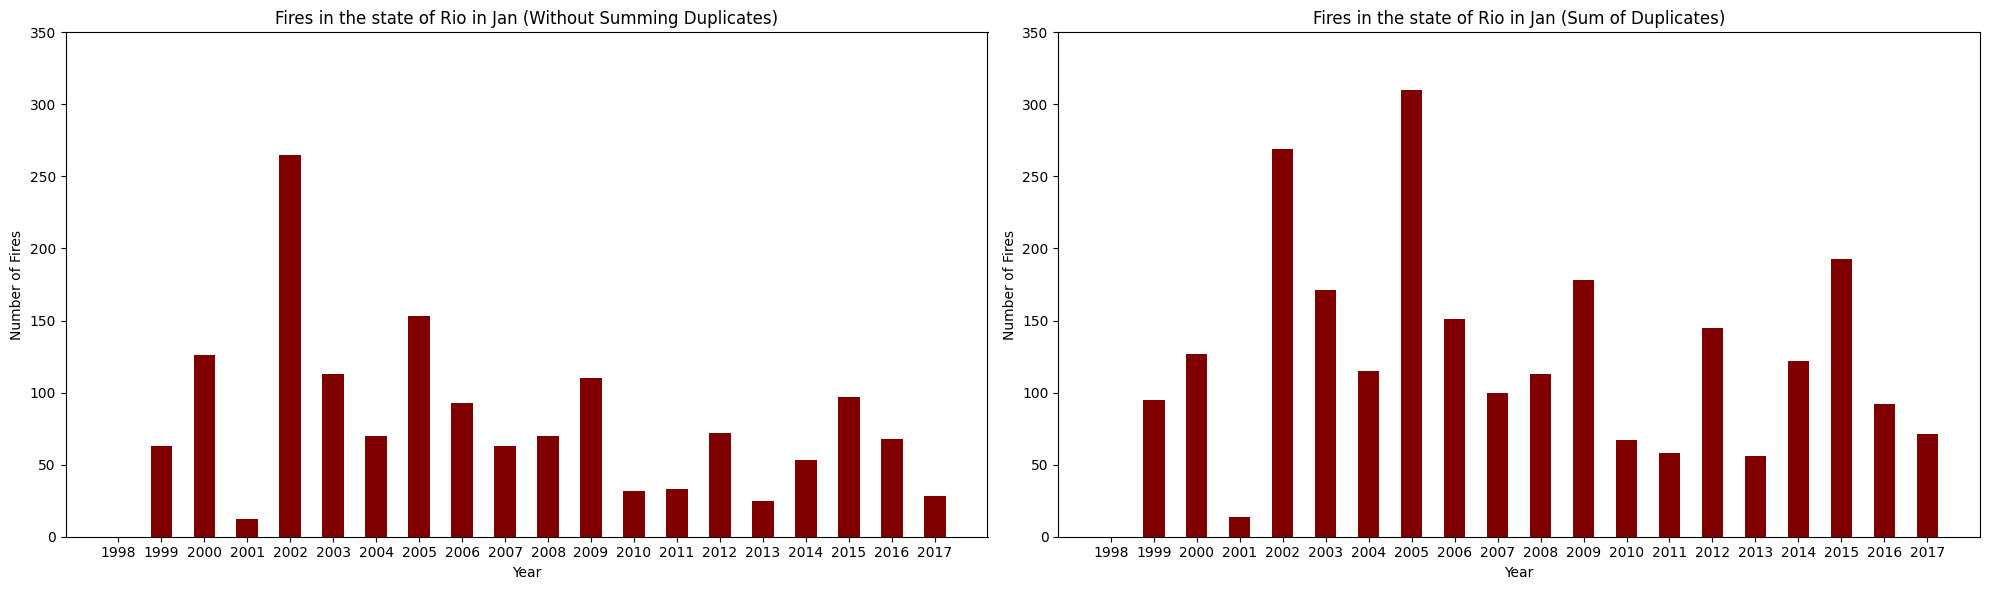

In [35]:
# Filter the DataFrame for the state 'Rio' and the month 'Jan'
df_rio_jan = df[(df['state'] == 'Rio') & (df['month'] == 'Jan')]

# Group the filtered DataFrame by year and sum the 'number' column
df_rio_jan_grouped = df_rio_jan.groupby('year')['number'].sum().reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# First subplot: Fires in the state of Rio in Jan
axes[0].bar(df_rio_jan['year'], df_rio_jan['number'], color='maroon', width=0.5)
axes[0].set_xticks(list(range(1998, 2018)))
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Fires')
axes[0].set_title('Fires in the state of Rio in Jan (Without Summing Duplicates)')

# Second subplot: Fires in the state of Rio in Jan with duplicates summed
axes[1].bar(df_rio_jan_grouped['year'], df_rio_jan_grouped['number'], color='maroon', width=0.5)
axes[1].set_xticks(list(range(1998, 2018)))
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Fires')
axes[1].set_title('Fires in the state of Rio in Jan (Sum of Duplicates)')

# Set a common Y-axis limit for both subplots
axes[0].set_ylim(0, 350)
axes[1].set_ylim(0, 350)

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Show the subplots
plt.show()

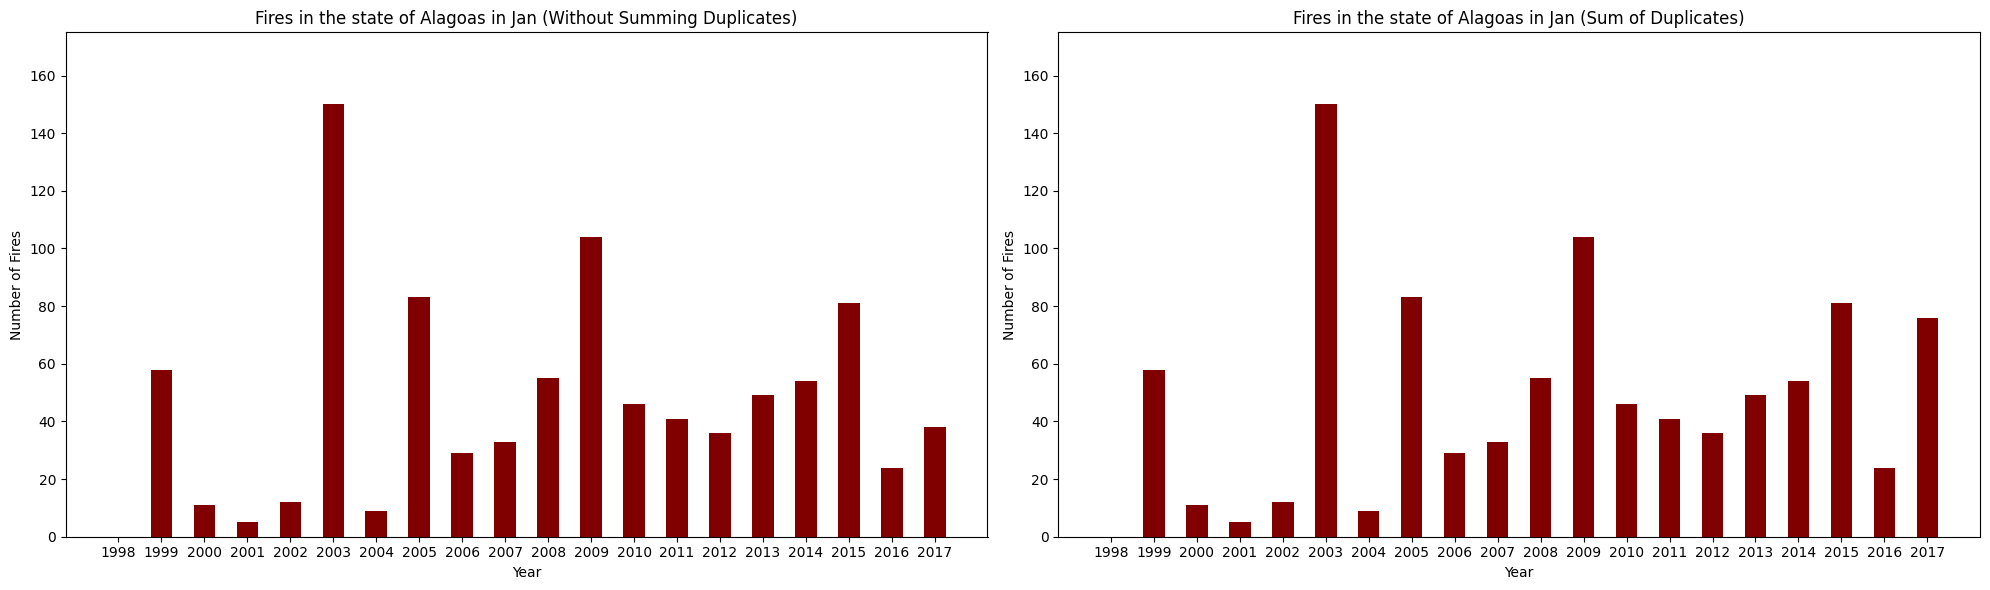

In [36]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Filter the DataFrame for the state 'Alagoas', the month 'Jan', and the year not equal to 2010
# Without summing duplicates
df_alagoas_jan = df[(df['state'] == 'Alagoas') & (df['month'] == 'Jan')]
axes[0].bar(df_alagoas_jan['year'], df_alagoas_jan['number'], color='maroon', width=0.5)
axes[0].set_xticks(list(range(1998, 2018)))
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Fires')
axes[0].set_title('Fires in the state of Alagoas in Jan (Without Summing Duplicates)')

# Filter the DataFrame for the state 'Alagoas', the month 'Jan', and the year not equal to 2010
# With duplicates summed
df_alagoas_jan = df[(df['state'] == 'Alagoas') & (df['month'] == 'Jan')]

# Group and sum the data by year
df_aggregated = df_alagoas_jan.groupby('year')['number'].sum().reset_index()
axes[1].bar(df_aggregated['year'], df_aggregated['number'], color='maroon', width=0.5)
axes[1].set_xticks(list(range(1998, 2018)))
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Fires')
axes[1].set_title('Fires in the state of Alagoas in Jan (Sum of Duplicates)')

# Set a common Y-axis limit for both subplots
axes[0].set_ylim(0, 175)
axes[1].set_ylim(0, 175)

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Show the subplots
plt.show()

Since we are not sure if the duplicated rows are valid data or not, and the values are low, we decided to keep this data.

## Exploratory Data Analysis

### Exercise 1 - To check minimum and maximum of "year" column.

In [37]:
# Find the minimum and maximum values in the 'year' feature
min_value = df['year'].min()
max_value = df['year'].max()

print(f"Minimum value in 'year': {min_value}")
print(f"Maximum value in 'year': {max_value}")

Minimum value in 'year': 1998
Maximum value in 'year': 2017


### Exercise 2 - To find out total number of fires in "Acre" state and visualizing data based on each "year".

Total number of fires in the state of Acre: 68345



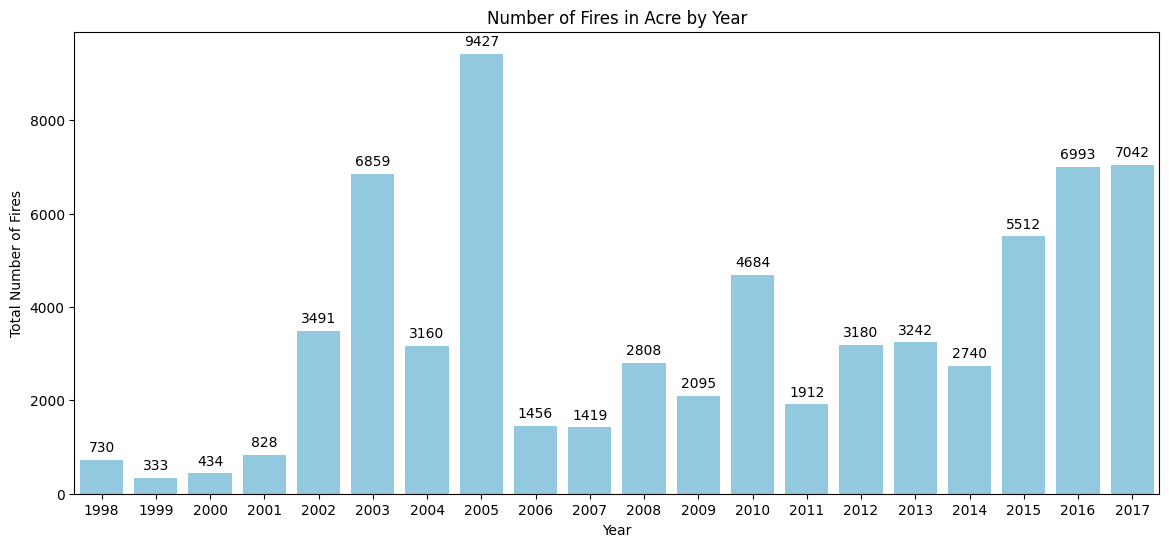

In [38]:
df_acre = df[df["state"] == "Acre"]
print("Total number of fires in the state of Acre: {}\n".format(int(df_acre['number'].sum())))

# Create a bar plot for number of fires in state 'Acre' for each year
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    x="year", y="number", data=df_acre, estimator=sum, color="skyblue", errorbar=None
)
# Add numbers on each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )
plt.title("Number of Fires in Acre by Year")
plt.xlabel("Year")
plt.ylabel("Total Number of Fires")
plt.show()

### Exercise 3 - To find out total number of fires by state.

In [39]:
# Calculate total number of fires by state
total_fires_by_state = (
    df.groupby("state")["number"]
    .sum()
    .reset_index()
    .sort_values(by="number", ascending=False)
)
total_fires_by_state

state    number
10       Mato Grosso  767890.0
12              Para  577841.0
9           Maranhao  375279.0
4              Bahia  226979.0
22         Tocantins  212432.0
17          Rondonia  183814.0
15              Piau  178707.0
11      Minas Gerais  165844.0
3           Amazonas  117467.0
8              Goias  110963.0
5              Ceara   80162.0
0               Acre   68345.0
13           Paraiba   65206.0
20         Sao Paulo   61299.0
16               Rio   46198.0
18           Roraima   27077.0
19    Santa Catarina   26420.0
2              Amapa   25116.0
14        Pernambuco   24498.0
7     Espirito Santo    6546.0
1            Alagoas    4667.0
6   Distrito Federal    3561.0
21           Sergipe    2710.0

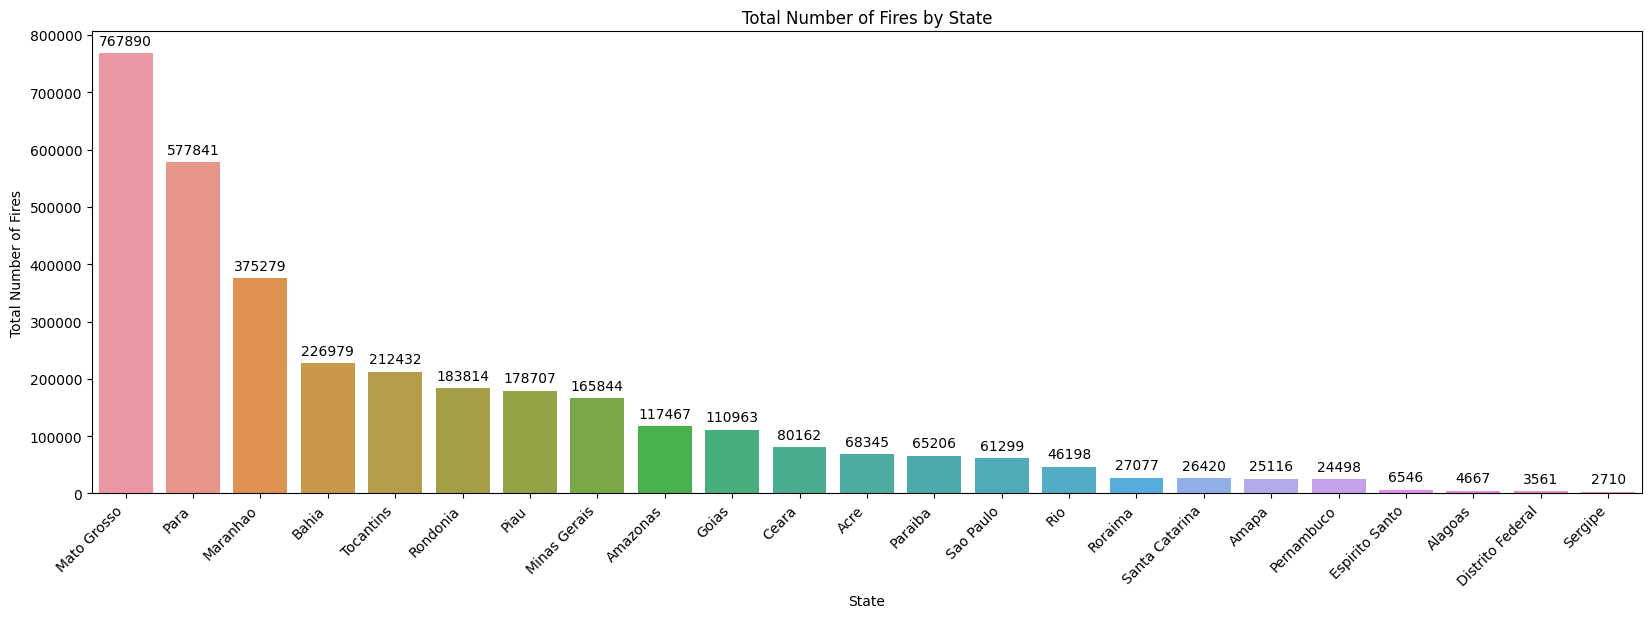

In [60]:
# Create the bar plot for total number of fires by state
plt.figure(figsize=(20, 6))
ax = sns.barplot(x="state", y="number", data=total_fires_by_state)
# Rotate state names for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
# Add exact numbers on each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )
plt.xlabel("State")
plt.ylabel("Total Number of Fires")
plt.title("Total Number of Fires by State")
plt.show()


### Exercise 4 - To find out total number of fires in 2010 and visualizing data based on each "month".

In [41]:
# Filter rows for the year 2010 and calculate the total number of fires
total_fires_2010 = df.loc[df["year"] == 2010, "number"].sum()
print("Total number of fires in 2010:", int(total_fires_2010))

Total number of fires in 2010: 222711


In [42]:
# Filter data for the year 2010 and group data by month
fires_by_month_2010 = (
    df[df["year"] == 2010].groupby("month")["number"].sum().reset_index()
)
fires_by_month_2010

month   number
0    Apr   2200.0
1    Aug  58985.0
2    Dez   6316.0
3    Feb   2386.0
4    Jan   2874.0
5    Jul  16646.0
6    Jun   3642.0
7    Mar   2417.0
8    May   3497.0
9    Nov  16584.0
10   Oct  31485.0
11   Sep  75679.0

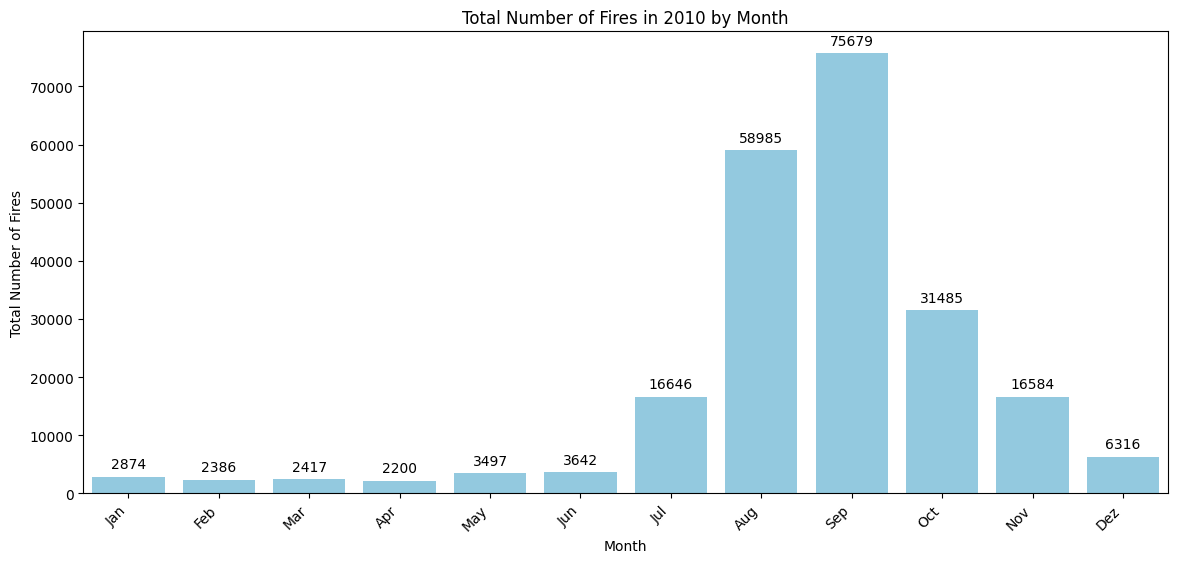

In [43]:
# Create the bar plot
month_order = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dez",
]
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    x="month",
    y="number",
    data=fires_by_month_2010,
    order=month_order,
    color="skyblue",
)
# Rotate month names for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
# Add exact numbers on each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )
plt.xlabel("Month")
plt.ylabel("Total Number of Fires")
plt.title("Total Number of Fires in 2010 by Month")
plt.show()

### Exercise 5 - To find out average number of total fires.

In [44]:
math.ceil(df['number'].mean())

534

#### Exercise 5.1 - Only Jan.

In [45]:
math.ceil(df.loc[df['month'] == 'Jan']['number'].mean())

98

### Exercise 6 - To find out the state names where fires occurred in "Dec" month.

In [46]:
df.loc[df['month'] == 'Dez']['state'].unique()

array(['Paraiba', 'Bahia', 'Amapa', 'Ceara', 'Mato Grosso', 'Tocantins',
       'Amazonas', 'Piau', 'Acre', 'Alagoas', 'Espirito Santo',
       'Distrito Federal', 'Minas Gerais', 'Goias', 'Para', 'Pernambuco',
       'Maranhao'], dtype=object)

### Extra: From na EDA perspective what analysis would you add?

#### Pie chart of fires by state

It allows to easily identify the states with more fires.

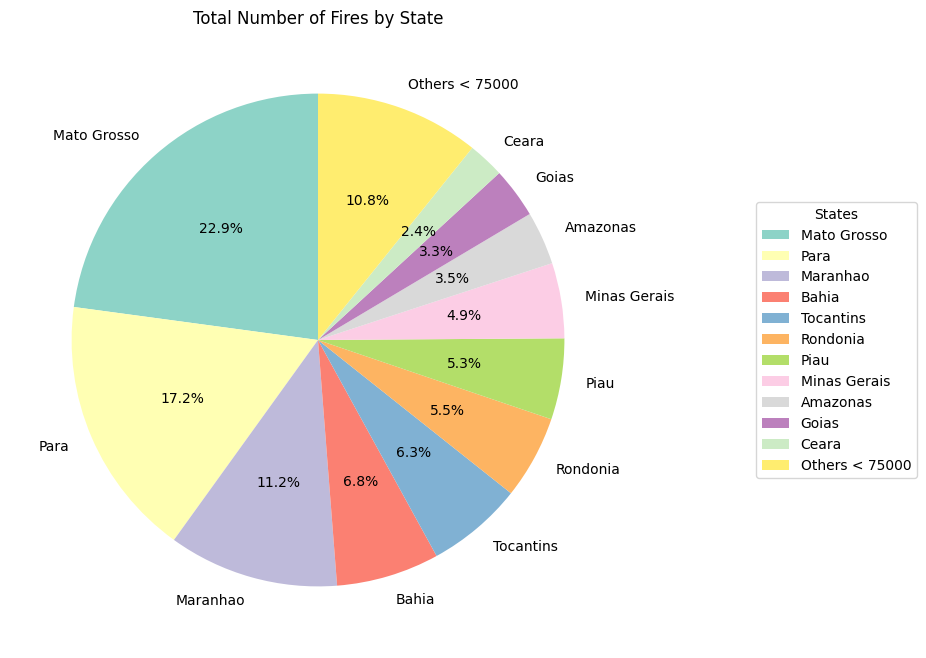

In [47]:
# Total fires by state
total_fires_by_state = total_fires_by_state.sort_values(by='number', ascending=False)
# Threshold for grouping into "Other" category
threshold = 75000
# Filter states with values above the threshold
large_categories = total_fires_by_state[total_fires_by_state['number'] >= threshold]
# Create a new DataFrame for the "Other" category
other_category = {
    'state': 'Others < 75000',
    'number': total_fires_by_state[total_fires_by_state['number'] < threshold]['number'].sum()
}

large_categories = pd.concat([large_categories, pd.DataFrame([other_category])], ignore_index=True)

# Create the pie chart with the new DataFrame
plt.figure(figsize=(12, 8))
ax = plt.subplot()
ax.pie(
    large_categories['number'],
    labels=large_categories['state'],
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("Set3"),
)
ax.legend(
    large_categories['state'],
    title="States",
    loc="center left",
    bbox_to_anchor=(1.2, 0, 0.5, 1),
)
plt.title("Total Number of Fires by State")
plt.show()

#### Evolution of fires by year

The goal is to assess whether fires are on an increasing trend.

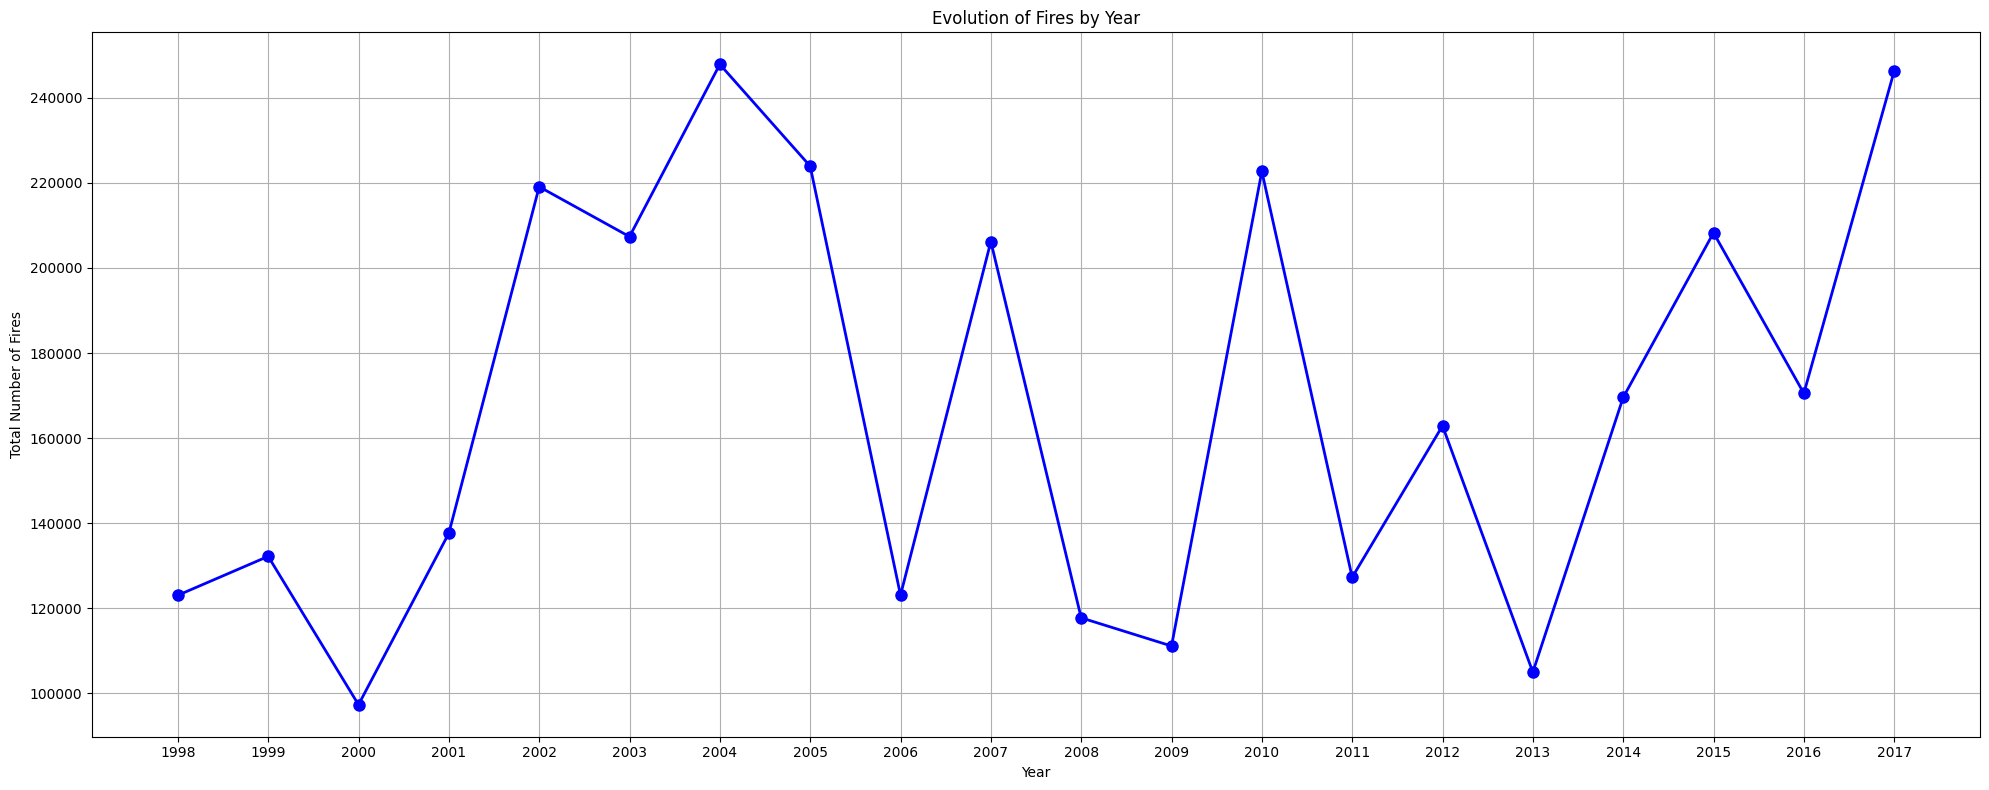

In [48]:
# Group the data by 'year' and sum the 'number' column within each group
fires_by_year = df.groupby("year")["number"].sum()
# Create a line chart for the evolution of fires by year
plt.figure(figsize=(20, 8))
ax = plt.subplot()
ax.plot(
    fires_by_year.index,
    fires_by_year.values,
    marker="o",
    color="b",
    linewidth=2,
    markersize=8,
)
plt.xlabel("Year")
plt.ylabel("Total Number of Fires")
plt.title("Evolution of Fires by Year")
plt.xticks(list(map(int, fires_by_year.index)))
plt.grid(True)
plt.tight_layout()
plt.show()

#### Evolution of fires by year for top 5 states

Checking if the top 5 states are always dominant over the years.

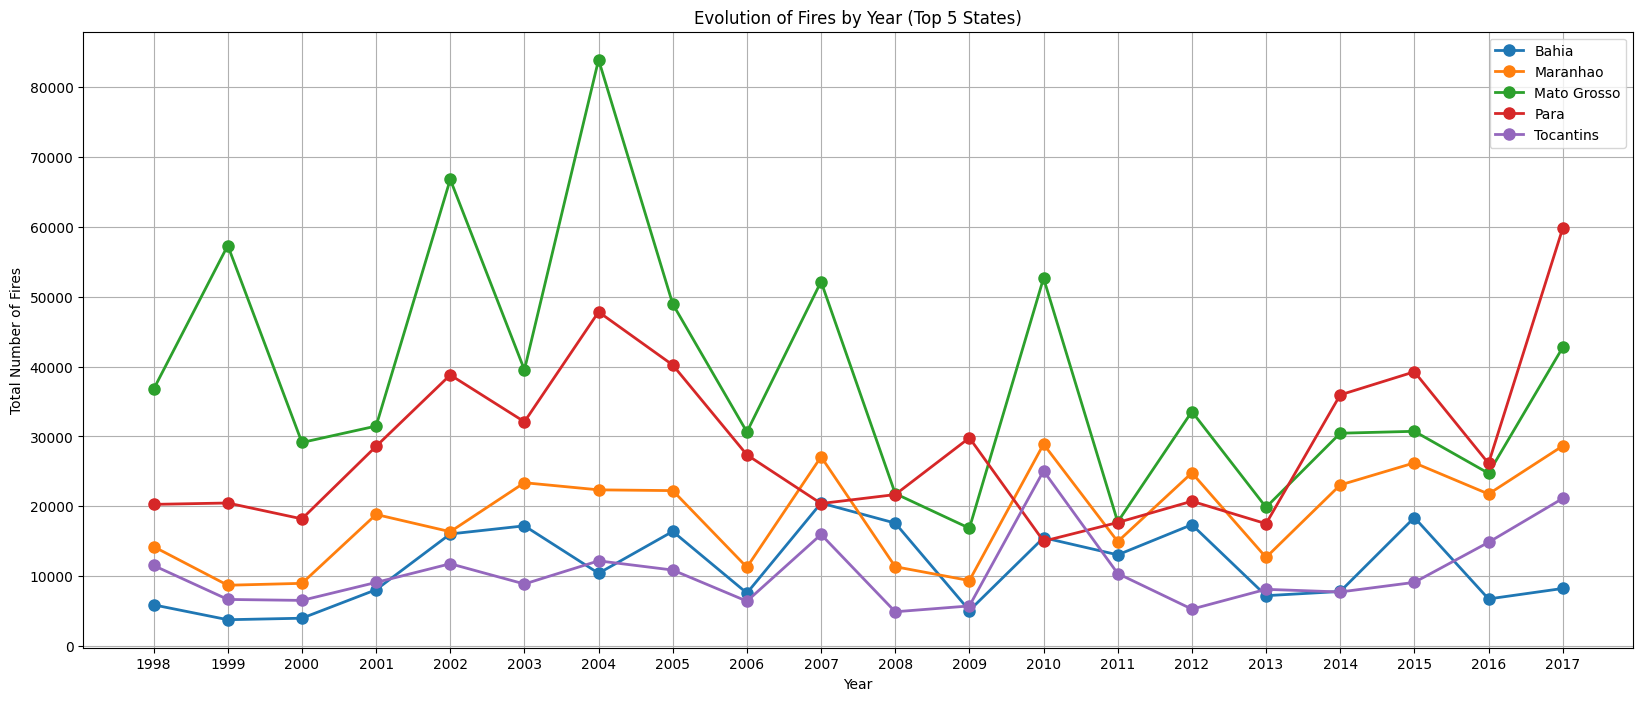

In [49]:
# Top 5 states with most fires for each year
top_states_by_year = (
    df[df["state"].isin(["Para", "Mato Grosso", "Maranhao", "Bahia", "Tocantins"])]
    .groupby(by=["year", "state"])
    .sum(numeric_only=True)
    .reset_index()
)
# Plot a line chart for each of the top 5 states by year
plt.figure(figsize=(20, 8))
ax = plt.subplot()
for state in top_states_by_year["state"].unique():
    state_data = top_states_by_year[top_states_by_year["state"] == state]
    ax.plot(
        state_data["year"],
        state_data["number"],
        marker="o",
        label=state,
        linewidth=2,
        markersize=8,
    )
plt.xlabel("Year")
plt.ylabel("Total Number of Fires")
plt.title("Evolution of Fires by Year (Top 5 States)")
plt.xticks(list(map(int, top_states_by_year["year"].unique())))
plt.legend()
plt.grid(True)
plt.show()

#### Average fires by month

The objective is to quickly identify which month has more fires on average.

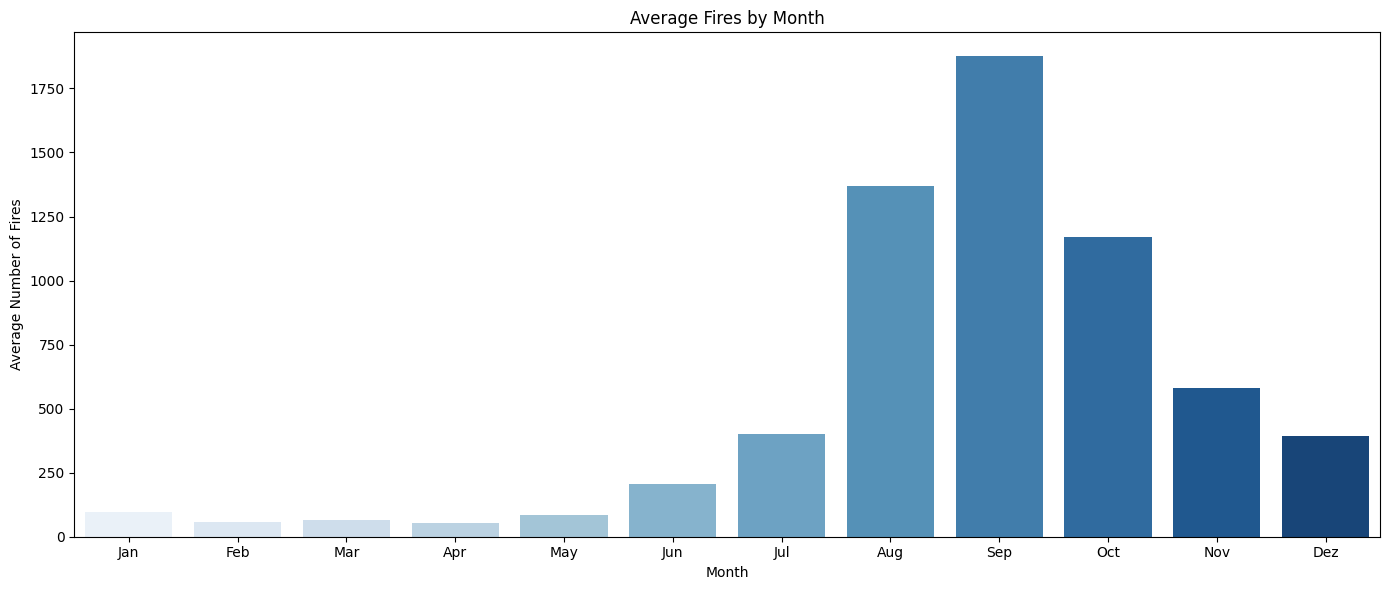

In [50]:
# Create a bar chart for average fires by month
average_fires_by_month = df.groupby("month")["number"].mean()
plt.figure(figsize=(14, 6))
ax = plt.subplot()
sns.barplot(
    x=average_fires_by_month.index,
    y=average_fires_by_month.values,
    order=month_order,
    palette="Blues",
    ax=ax,
)
plt.xlabel("Month")
plt.ylabel("Average Number of Fires")
plt.title("Average Fires by Month")
plt.tight_layout()
plt.show()

#### Correlation Matrix

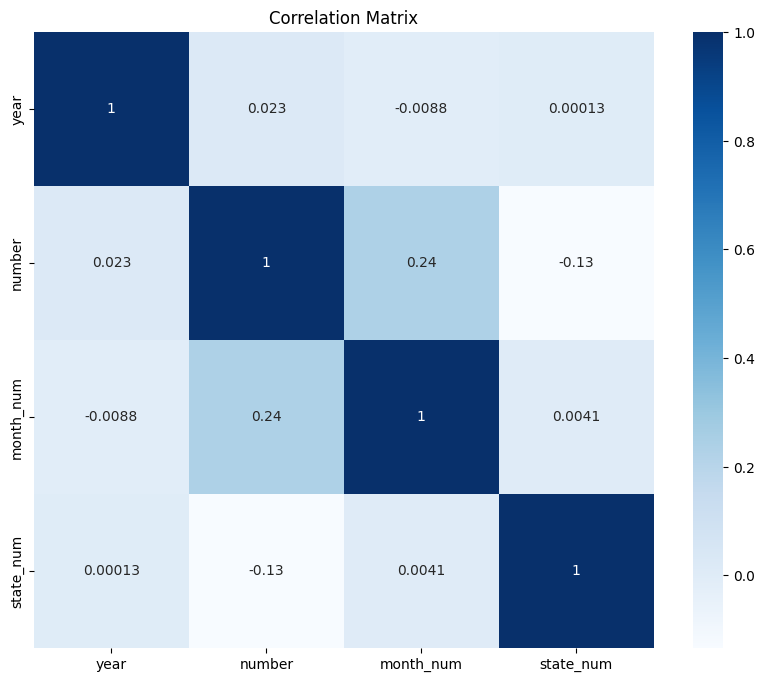

In [51]:
# Convert months and states to numerical values
months_map = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dez": 12,
}
states_map = {state: idx for idx, state in enumerate(df["state"].unique(), start=1)}
# Map months and states to numerical values in the copied DataFrame
df_copy = df.copy()
df_copy["month_num"] = df_copy["month"].map(months_map)
df_copy["state_num"] = df_copy["state"].map(states_map)

# Calculate the correlation matrix for the modified dataframe
corr_matrix = df_copy.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.heatmap(corr_matrix, annot=True, cmap="Blues", ax=ax)
plt.title("Correlation Matrix")
plt.show()

The highest correlation is between number of fires and months, although it is a low index.

We can also calculate the correlation matrix by month for each state to check if fires in neighboring states are correlated.

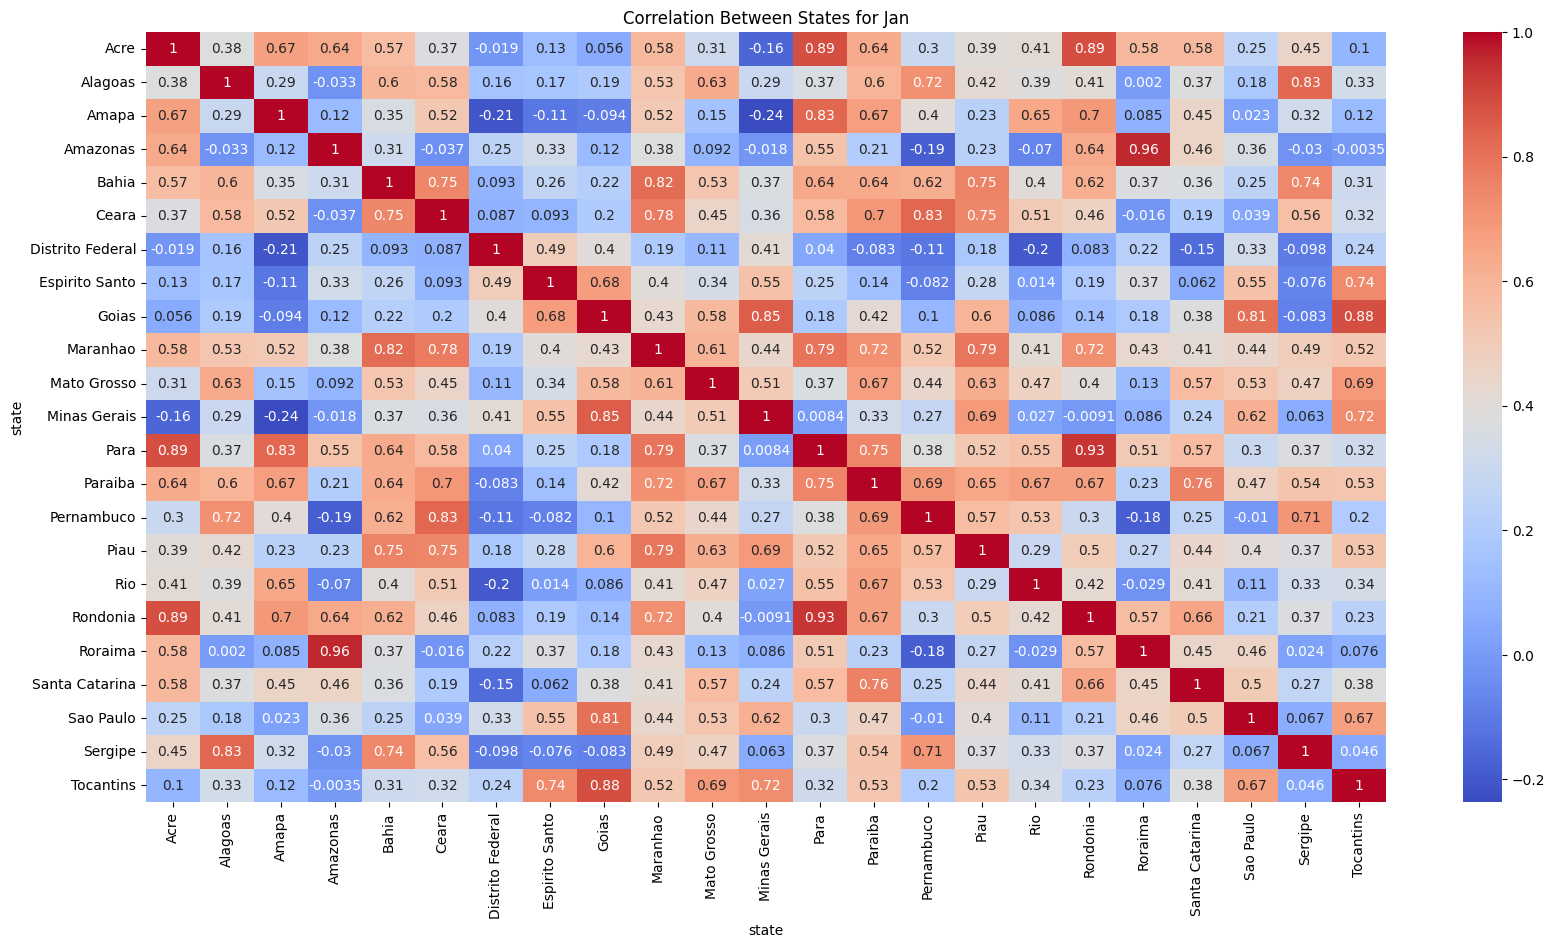

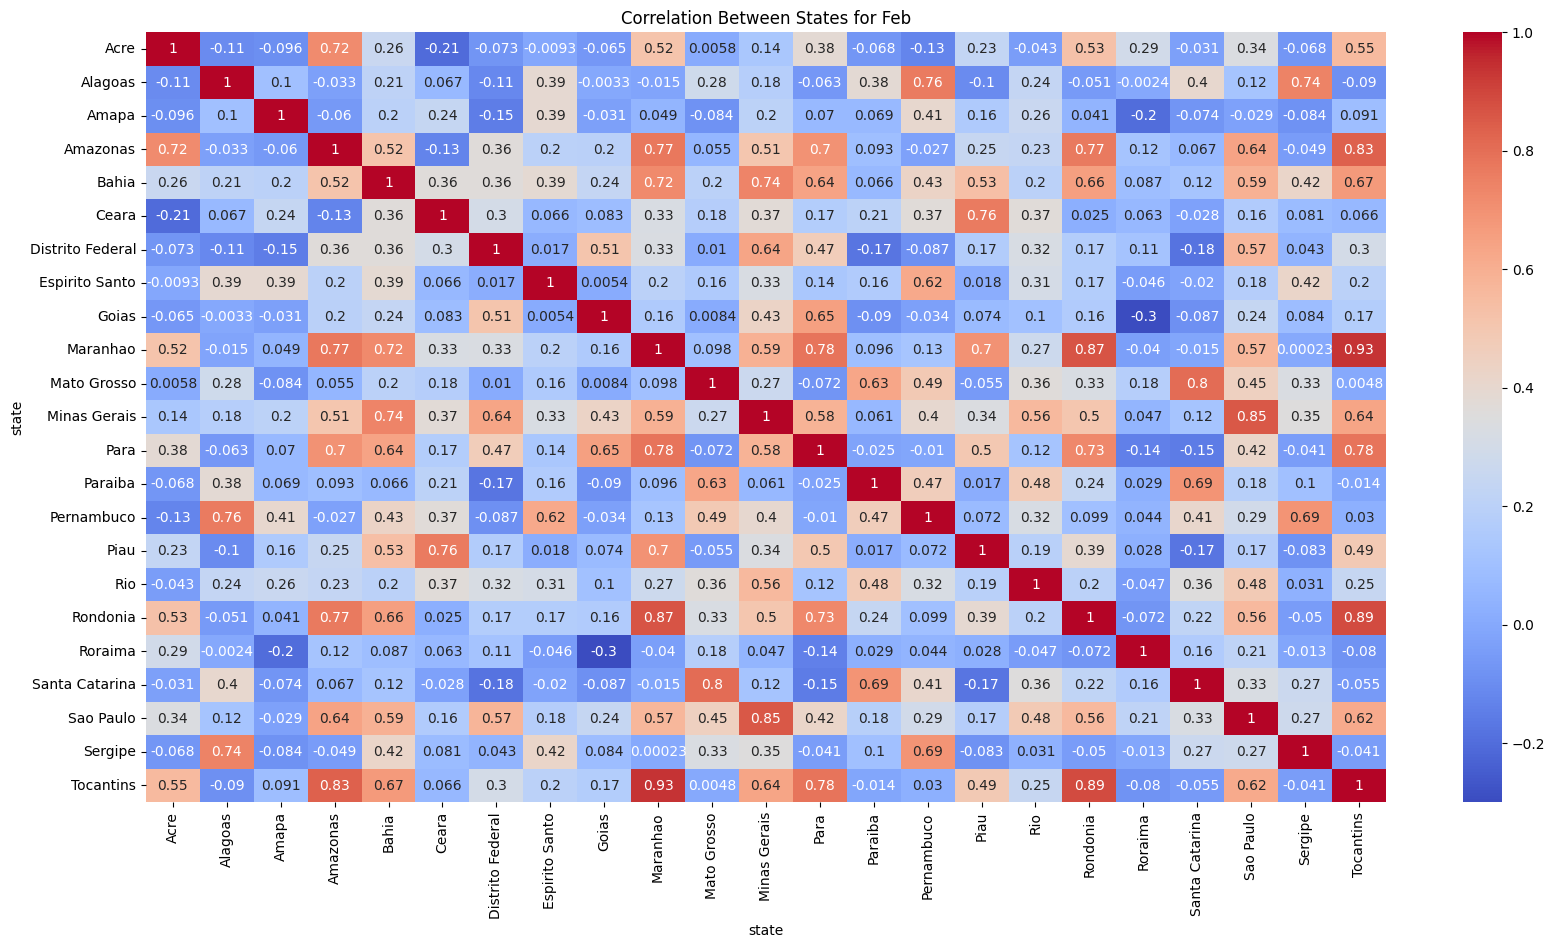

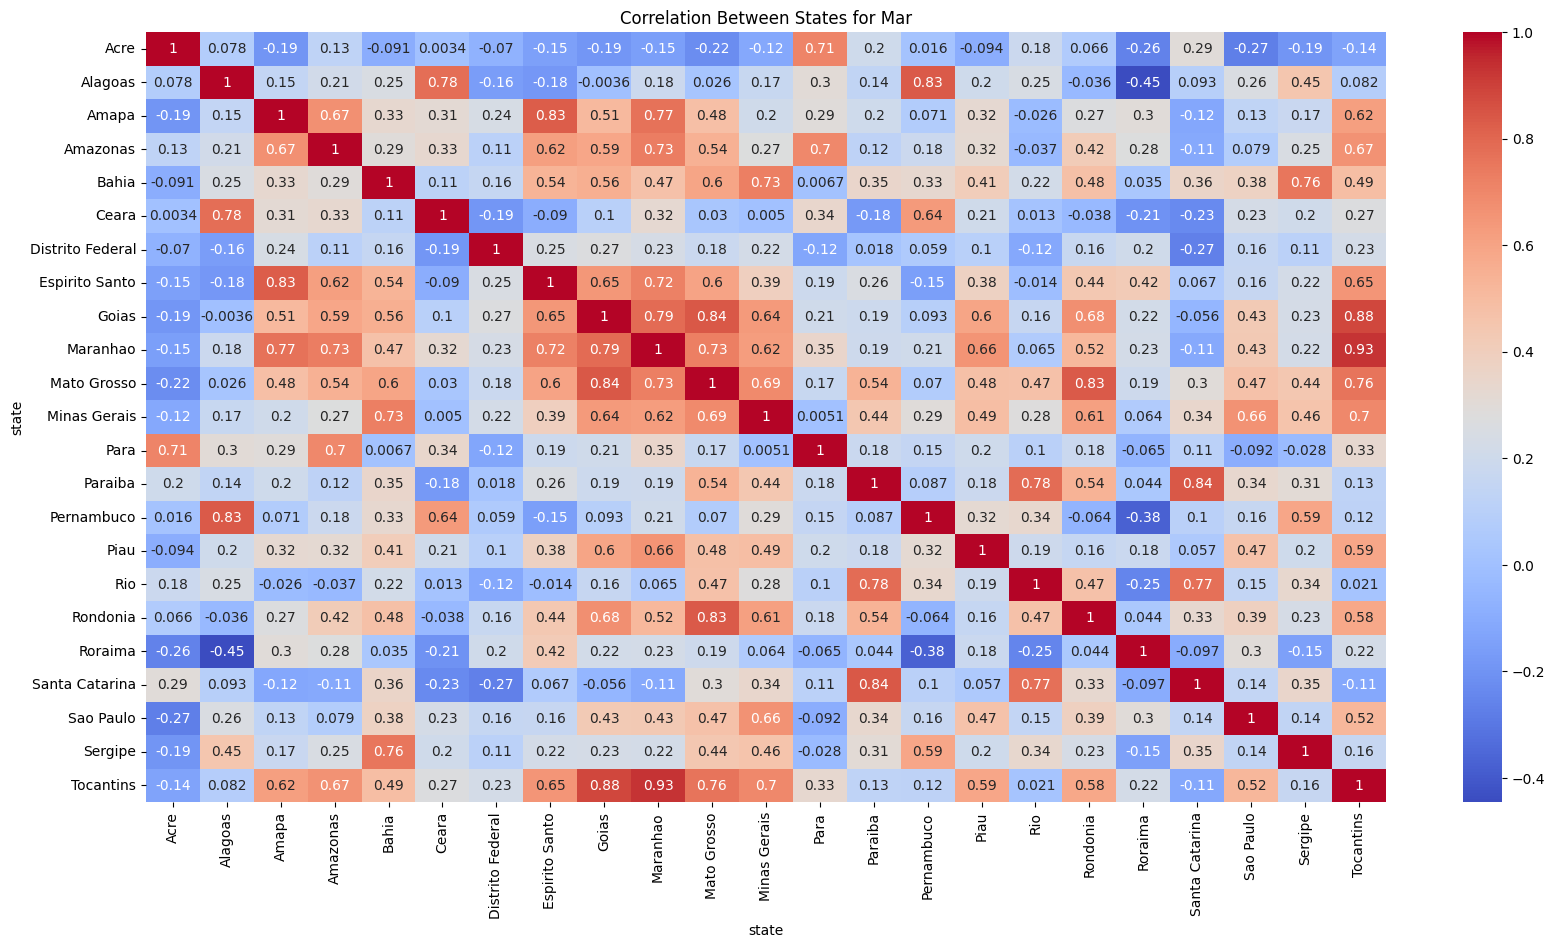

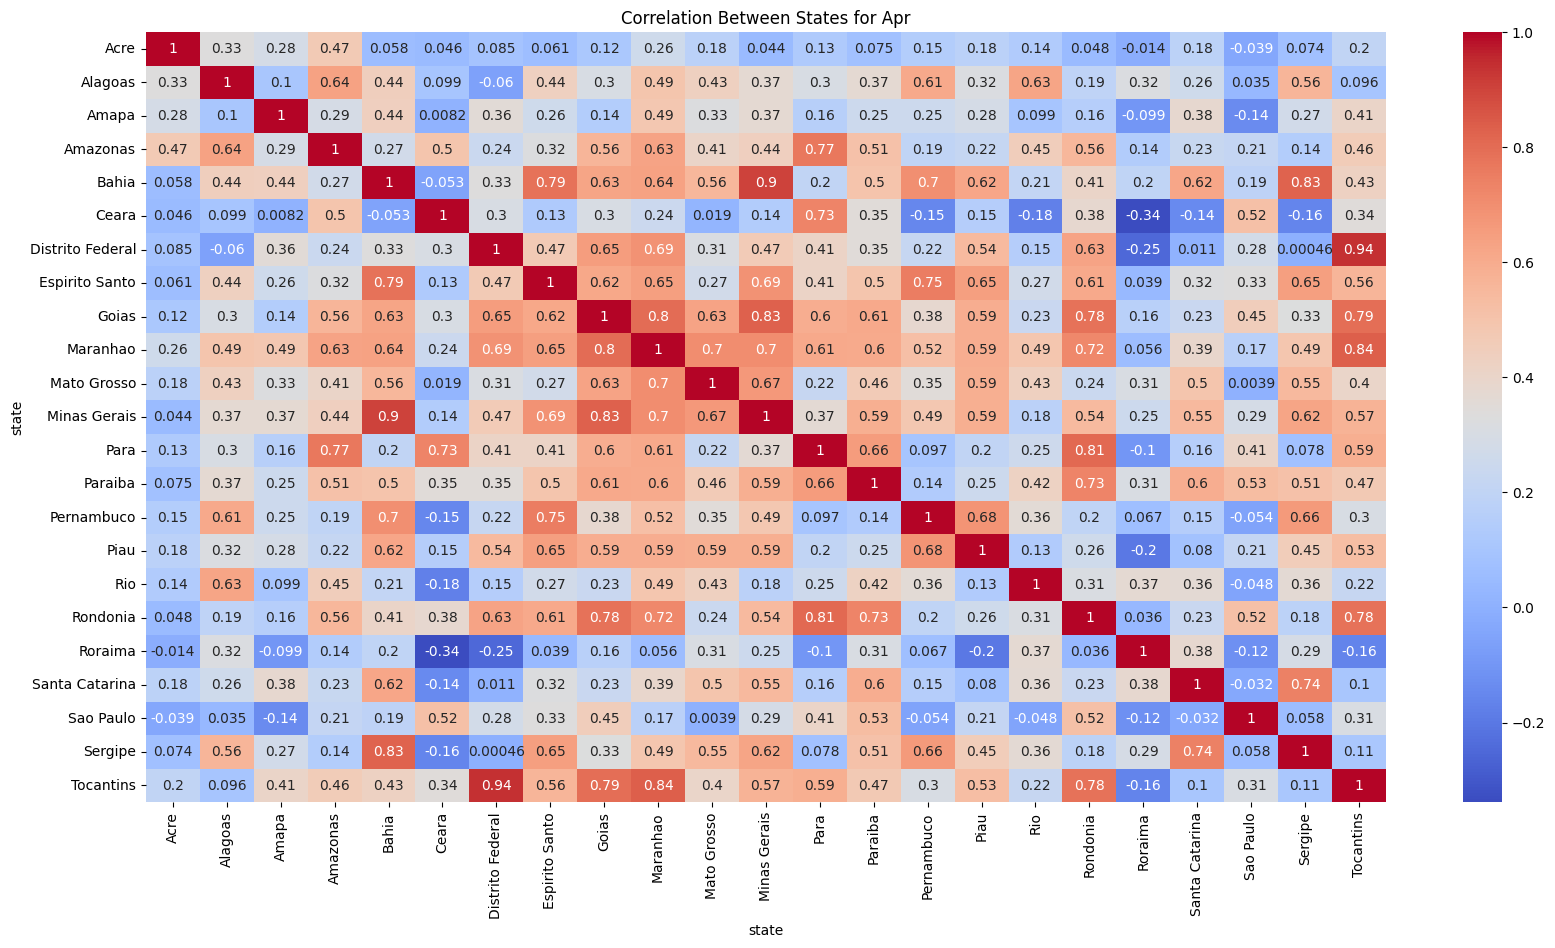

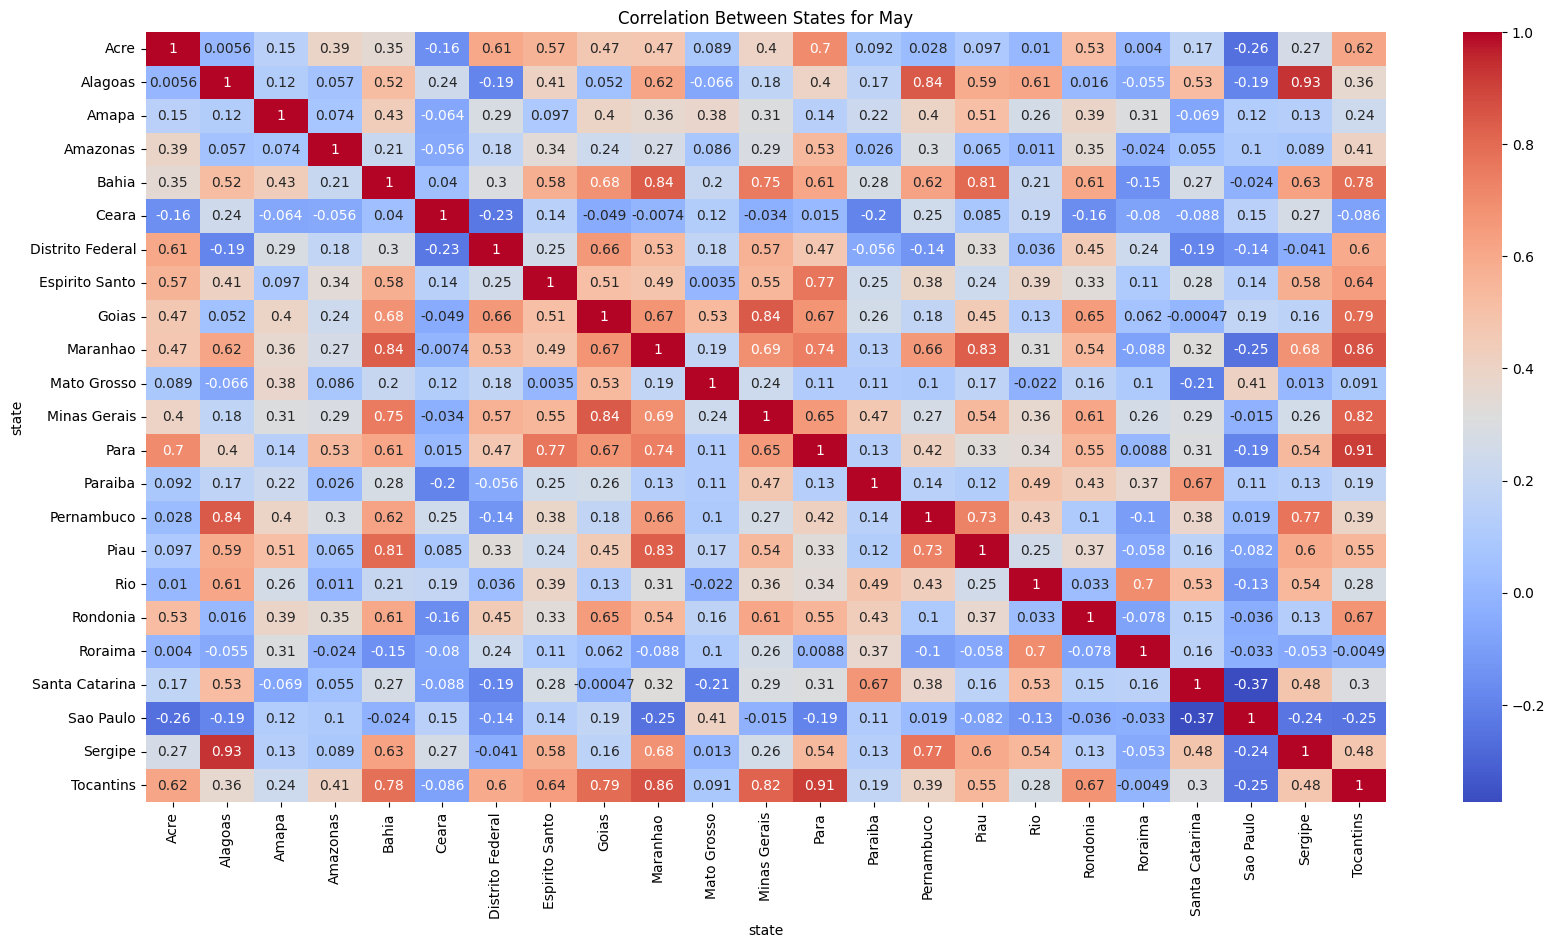

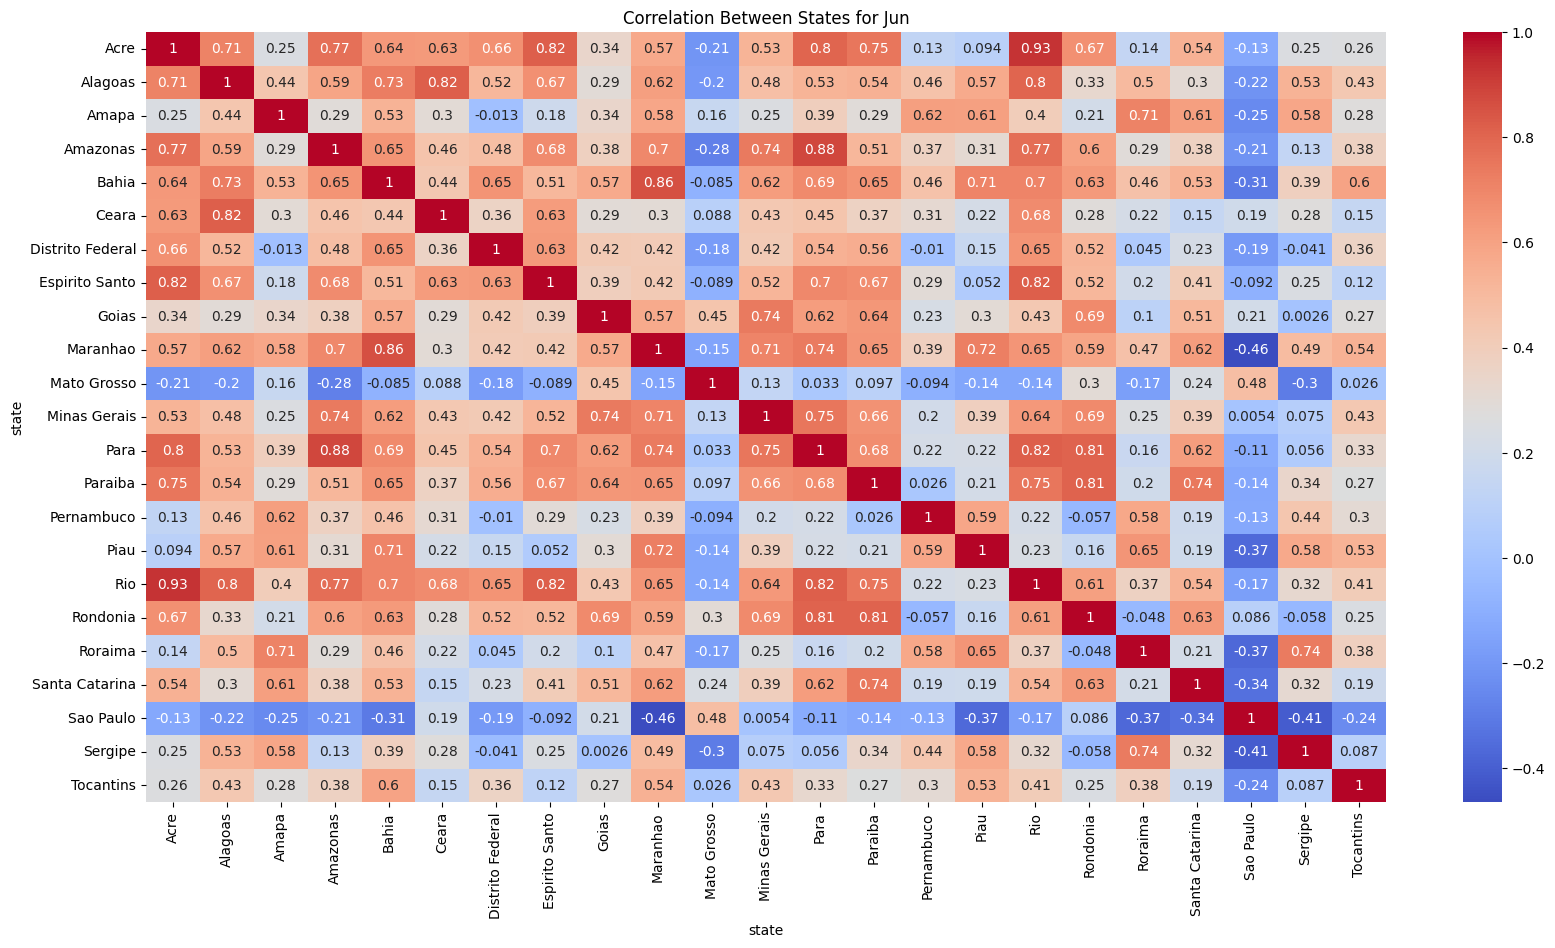

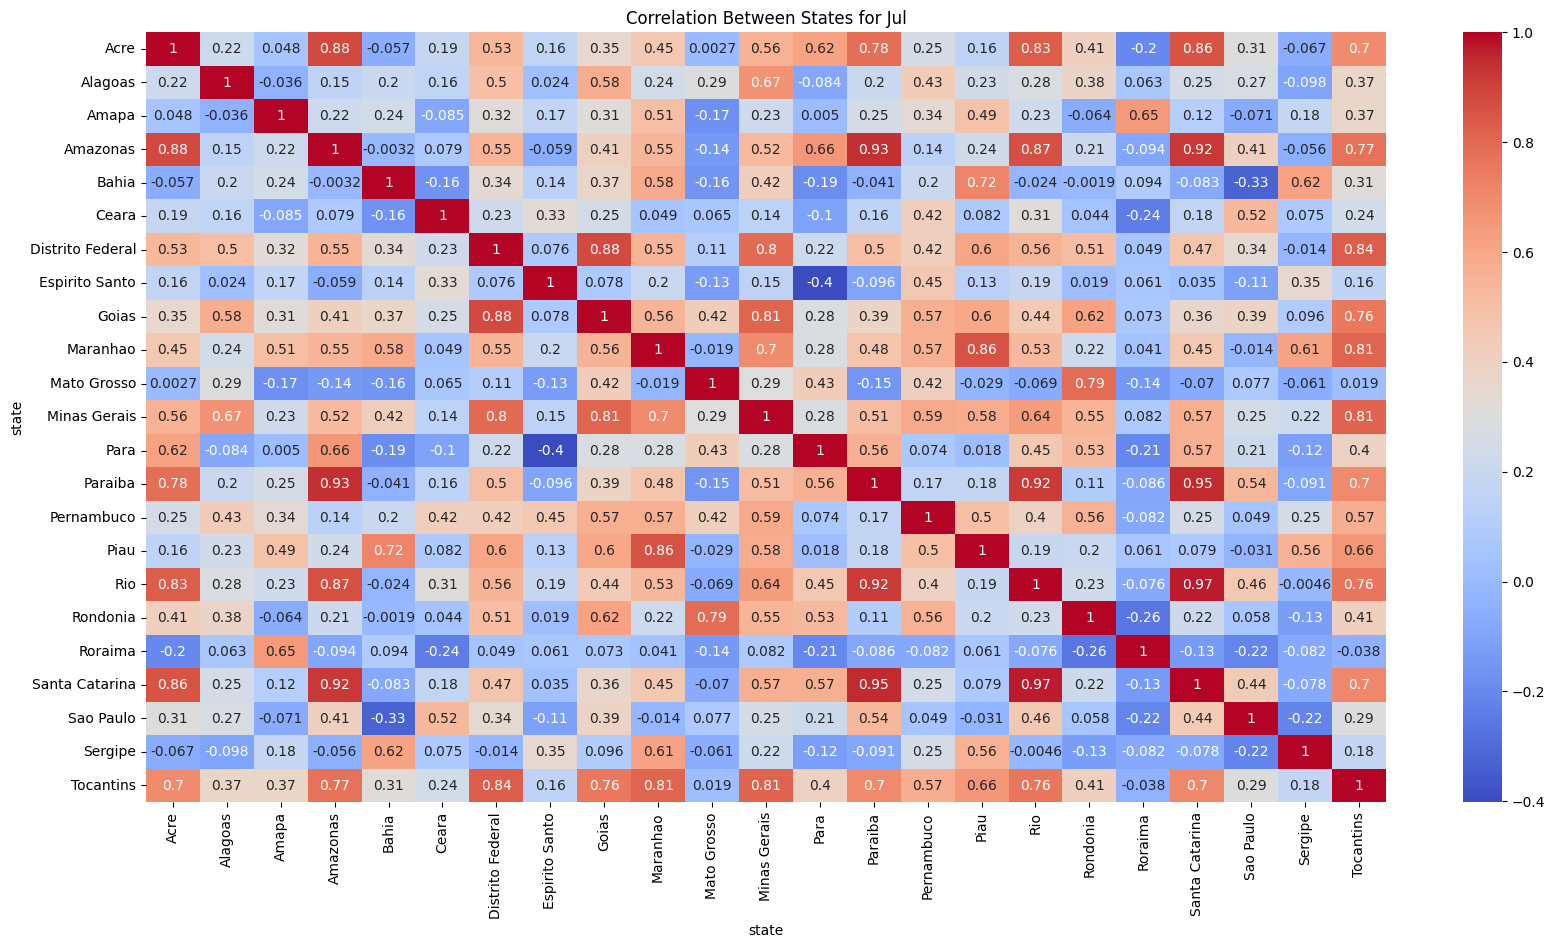

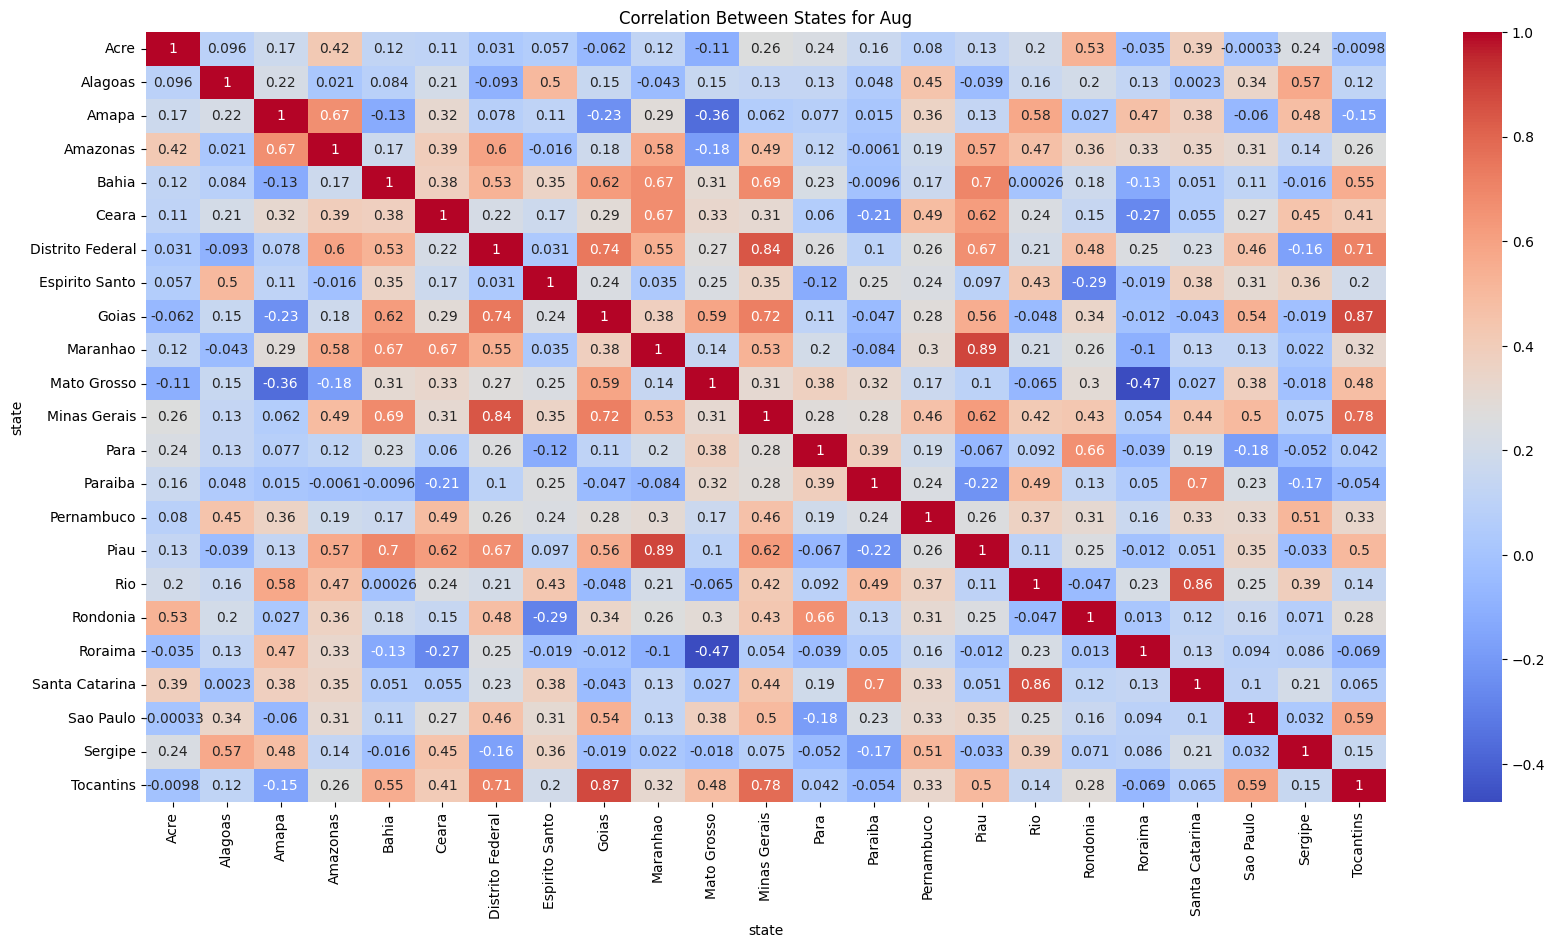

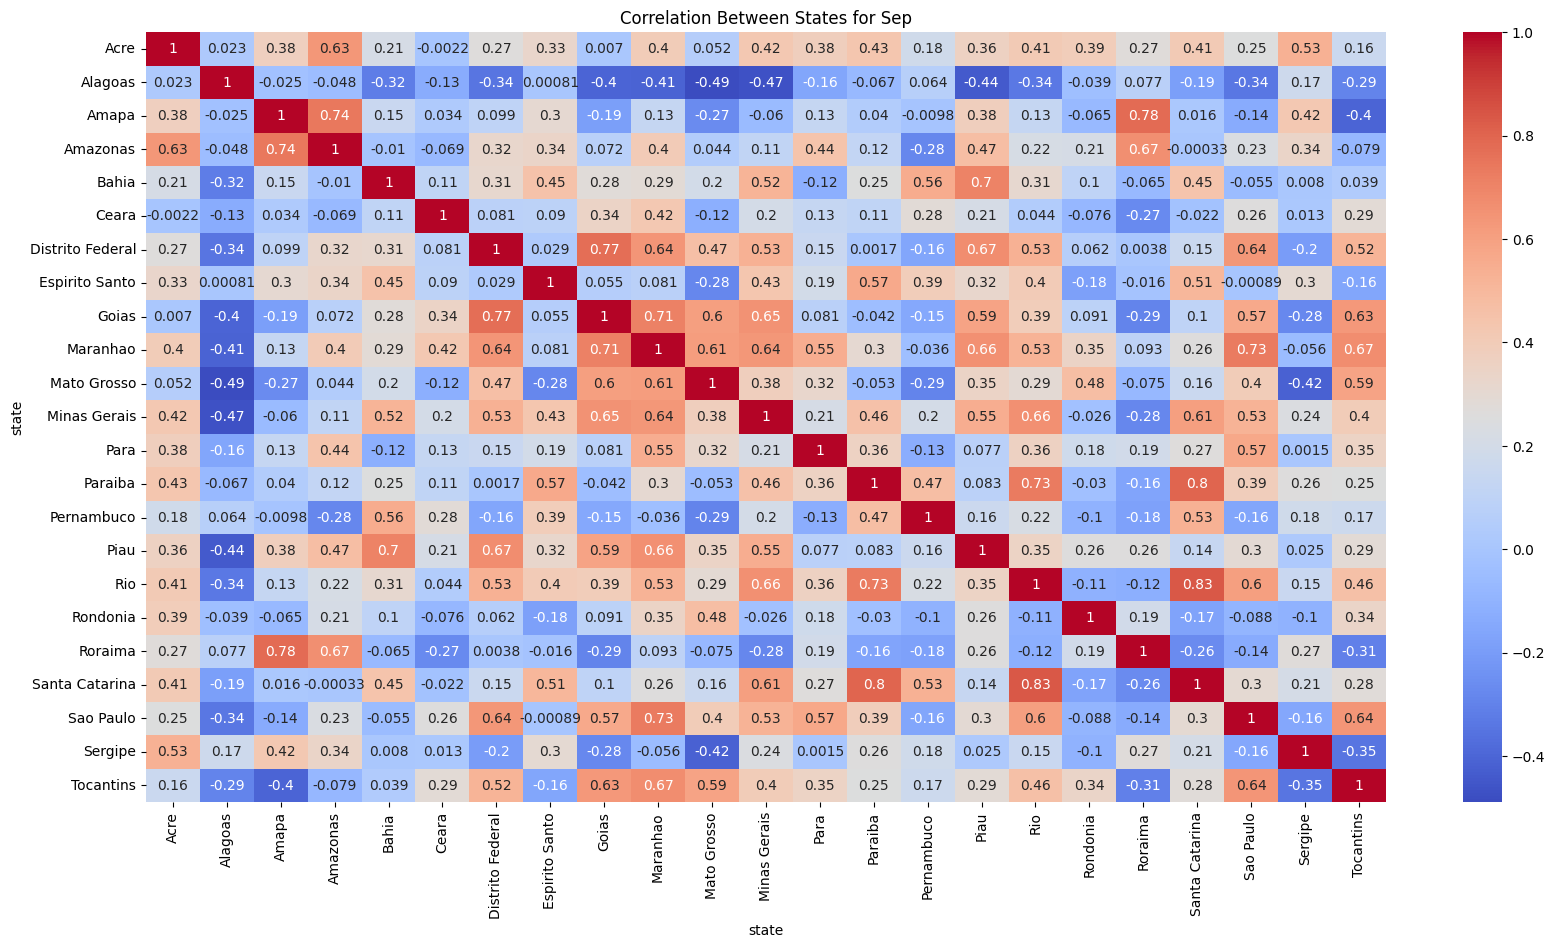

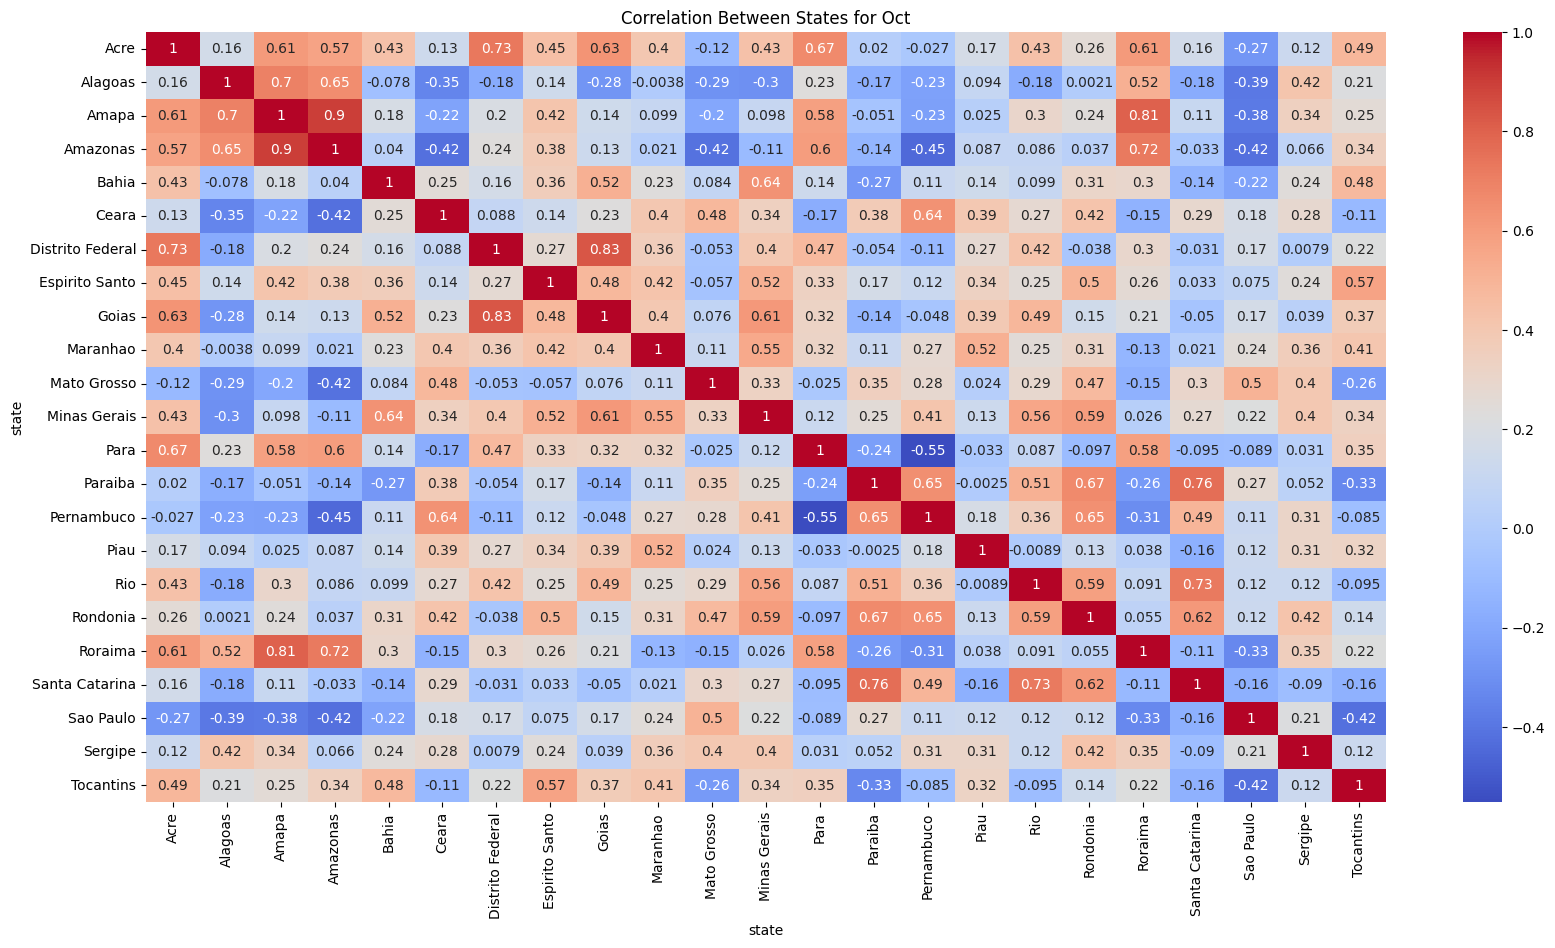

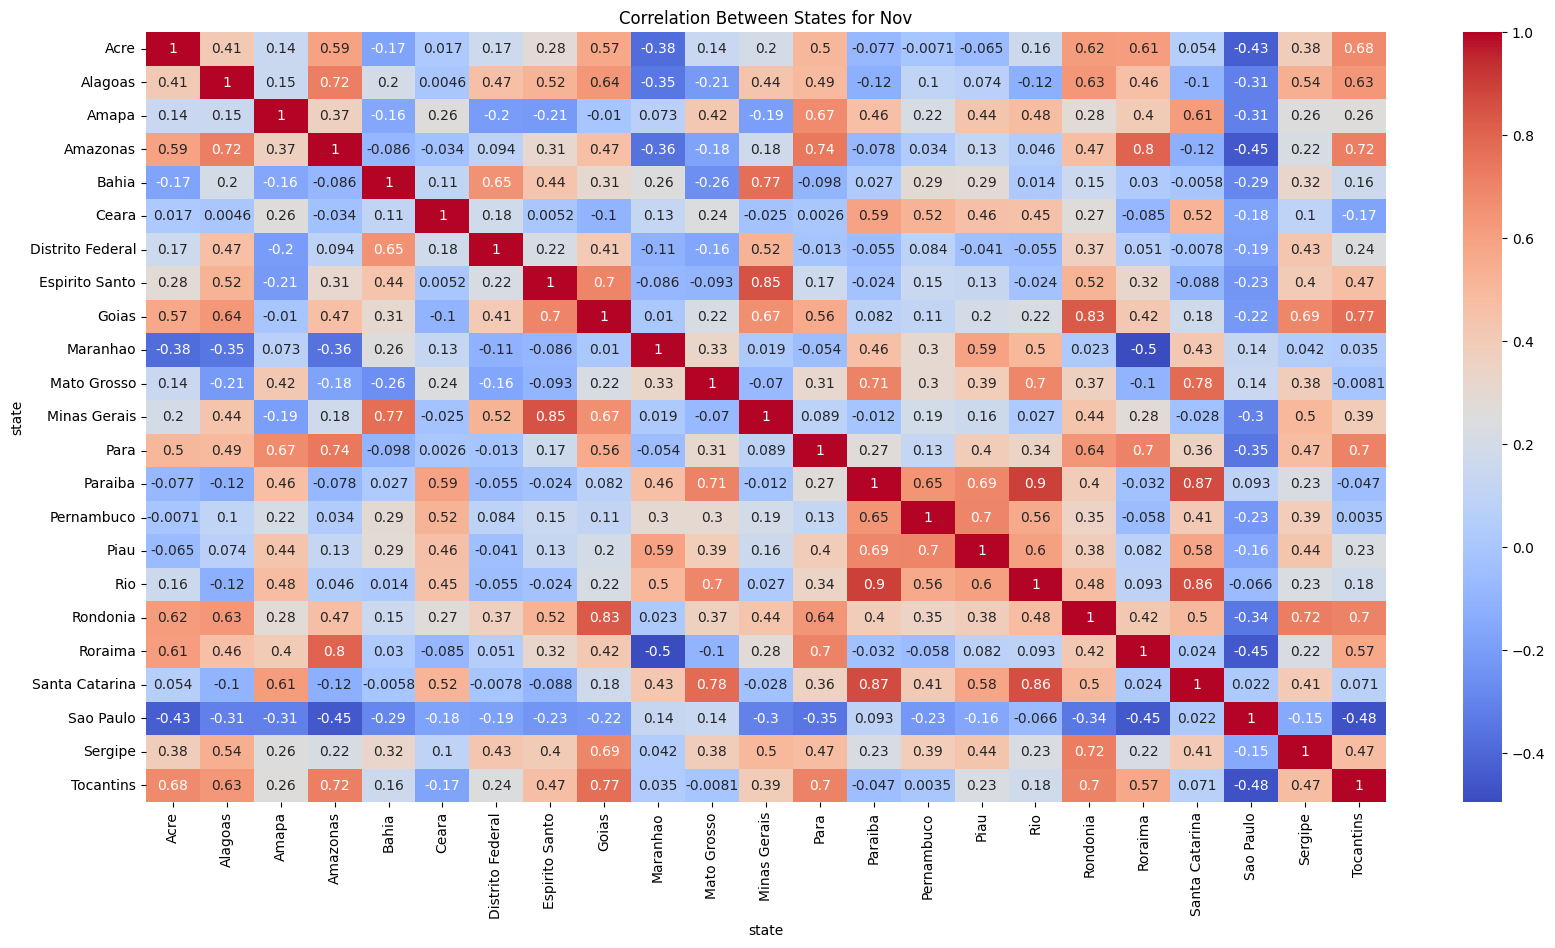

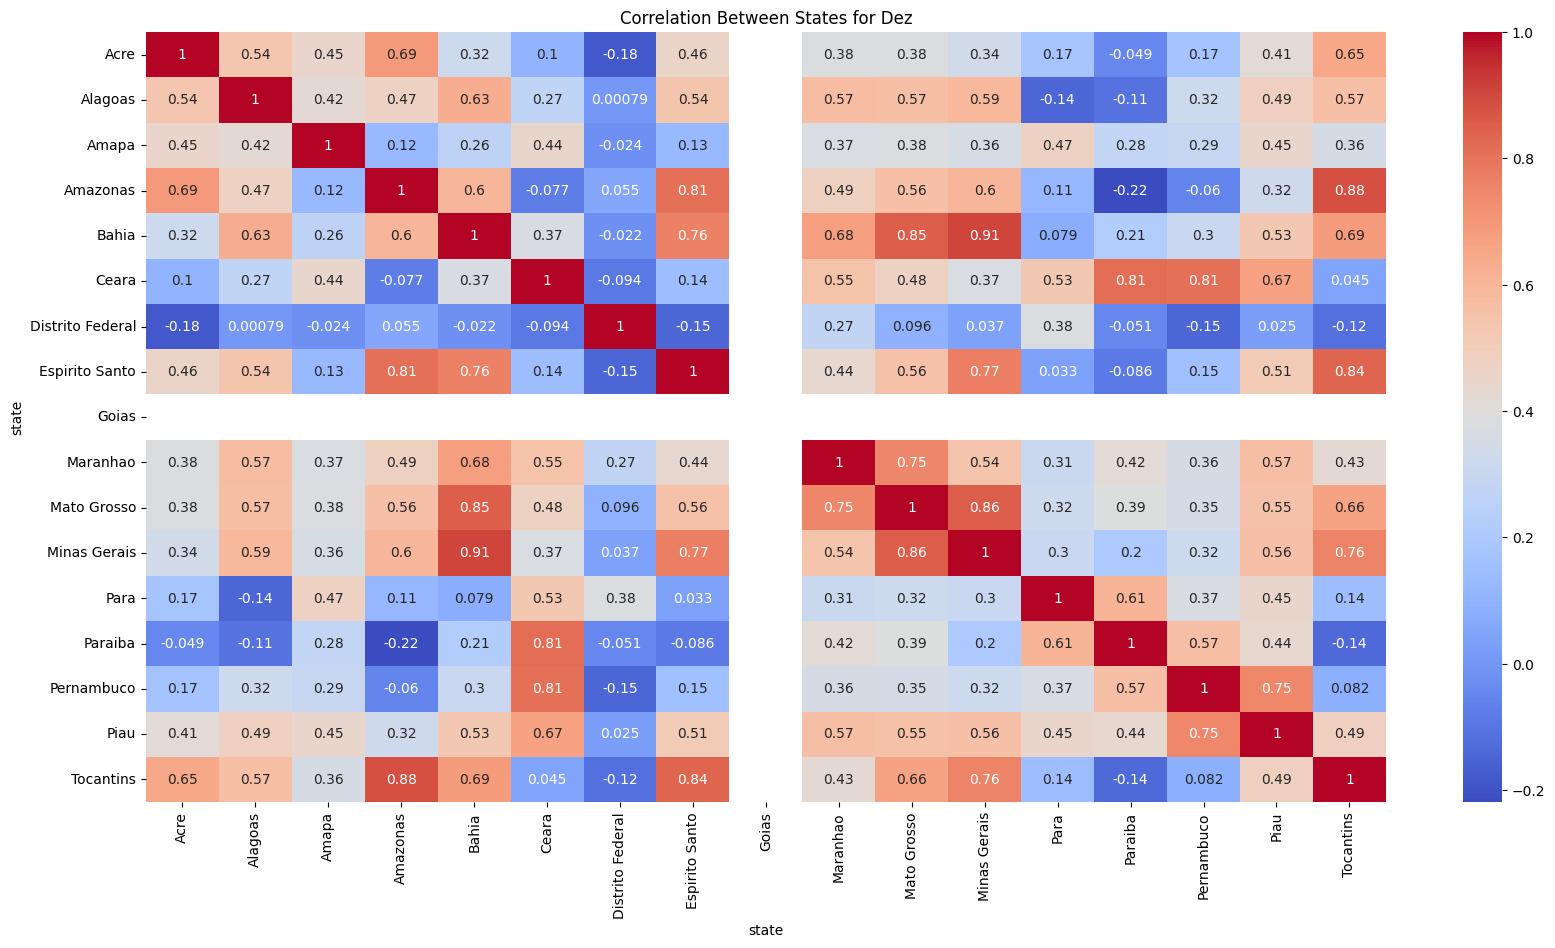

In [52]:
# Create an empty list to store the correlation matrices
correlation_matrices = []

for month_num in range(1, 13):
    # Filter the data for the current month
    monthly_data = df_copy[df_copy["month_num"] == month_num]
    # Check if there is sufficient data for the current month
    if not monthly_data.empty:
        # Pivot the data to create a table with years as rows, states as columns, and number of fires as values
        pivot_table = monthly_data.pivot_table(
            index="year", columns="state", values="number", aggfunc="sum"
        )
        # Calculate the correlation matrix for the current month
        correlation_matrix = pivot_table.corr()
        correlation_matrices.append(correlation_matrix)

for month_num, correlation_matrix in enumerate(correlation_matrices, start=1):
    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(
        f"Correlation Between States for {list(months_map.keys())[month_num - 1]}"
    )
    plt.show()

**Note:** The correlation matrix for December reveals that certain states lack data entries for this specific month. Additionally, the state "Goias" shows zero recorded fires for all years in December, except for 2017, for which no data has been inserted. Consequently, there is a blank line corresponding to this state in the correlation matrix.

In [53]:
df[(df["state"] == "Goias") & (df["month"] == "Dez")].sort_values(
    by="year", ascending=True
)

year  state month  number
888   1998  Goias   Dez     0.0
4134  1999  Goias   Dez     0.0
6114  2000  Goias   Dez     0.0
6185  2001  Goias   Dez     0.0
2611  2002  Goias   Dez     0.0
4520  2003  Goias   Dez     0.0
2295  2004  Goias   Dez     0.0
4485  2005  Goias   Dez     0.0
1171  2006  Goias   Dez     0.0
1029  2007  Goias   Dez     0.0
550   2008  Goias   Dez     0.0
2364  2009  Goias   Dez     0.0
2638  2010  Goias   Dez     0.0
4953  2011  Goias   Dez     0.0
6261  2012  Goias   Dez     0.0
4252  2013  Goias   Dez     0.0
4286  2014  Goias   Dez     0.0
5155  2015  Goias   Dez     0.0
2237  2016  Goias   Dez     0.0

#### Check if the area of the state impacts the number of fires

In [54]:
df['state'].unique()

array(['Mato Grosso', 'Bahia', 'Amazonas', 'Maranhao', 'Sergipe',
       'Paraiba', 'Pernambuco', 'Rondonia', 'Acre', 'Rio', 'Para',
       'Santa Catarina', 'Sao Paulo', 'Minas Gerais', 'Distrito Federal',
       'Roraima', 'Piau', 'Espirito Santo', 'Ceara', 'Alagoas', 'Amapa',
       'Tocantins', 'Goias'], dtype=object)

In [55]:
# Create a dictionary with state names and their corresponding areas
area_data = {
    'Mato Grosso': 903366.192,
    'Bahia': 564733.177,
    'Amazonas': 1570947.62,
    'Maranhao': 331983.293,
    'Sergipe': 21910.348,
    'Paraiba': 56469.778,
    'Pernambuco': 98311.616,
    'Rondonia': 237590.547,
    'Acre': 152581.433,
    'Rio': 43696.054,
    'Santa Catarina': 95346.181,
    'Sao Paulo': 248222.362,
    'Minas Gerais': 586528.293,
    'Distrito Federal': 5822.100,
    'Roraima': 223644.527,
    'Piau': 251529.186,
    'Espirito Santo': 46095.583,
    'Ceara': 148920.472,
    'Alagoas': 27767.659,
    'Amapa': 142814.588,
    'Tocantins': 277620.914,
    'Goias': 340111.783,
    'Para': 1247689.515
}

# Convert the dictionary to a DataFrame
area_df = pd.DataFrame(list(area_data.items()), columns=['state', 'Area'])

# Merge the "Area" DataFrame with your existing DataFrame using the 'state' column
df = df.merge(area_df, on='state', how='left')

In [56]:
df.head()

year        state month  number         Area
0  2002  Mato Grosso   Jun   517.0   903366.192
1  2005        Bahia   Aug   948.0   564733.177
2  2010     Amazonas   Apr    11.0  1570947.620
3  2014     Maranhao   Apr    78.0   331983.293
4  2001      Sergipe   Mar     1.0    21910.348

In [57]:
# Group the data by 'state' and calculate the sum of fires and the area
state_summary = df.groupby('state').agg({'number': 'sum', 'Area': 'first'}).reset_index()

# Rename the columns for clarity
state_summary.rename(columns={'number': 'total_fires', 'Area': 'state_area'}, inplace=True)

# Now, state_summary contains the total fires and state area for each state
state_summary

state  total_fires   state_area
0               Acre      68345.0   152581.433
1            Alagoas       4667.0    27767.659
2              Amapa      25116.0   142814.588
3           Amazonas     117467.0  1570947.620
4              Bahia     226979.0   564733.177
5              Ceara      80162.0   148920.472
6   Distrito Federal       3561.0     5822.100
7     Espirito Santo       6546.0    46095.583
8              Goias     110963.0   340111.783
9           Maranhao     375279.0   331983.293
10       Mato Grosso     767890.0   903366.192
11      Minas Gerais     165844.0   586528.293
12              Para     577841.0  1247689.515
13           Paraiba      65206.0    56469.778
14        Pernambuco      24498.0    98311.616
15              Piau     178707.0   251529.186
16               Rio      46198.0    43696.054
17          Rondonia     183814.0   237590.547
18           Roraima      27077.0   223644.527
19    Santa Catarina      26420.0    95346.181
20         Sao Paulo      61299.0   248222.362
21           Sergipe       2710.0    21910.348
22         Tocantins     212432.0   277620.914

In [58]:
# Calculate total fires per square kilometer and add it as a new column
state_summary['total_fires_per_km2'] = state_summary['total_fires'] / (state_summary['state_area'] / 1_000_000)

state_summary

state  total_fires   state_area  total_fires_per_km2
0               Acre      68345.0   152581.433         4.479247e+05
1            Alagoas       4667.0    27767.659         1.680732e+05
2              Amapa      25116.0   142814.588         1.758644e+05
3           Amazonas     117467.0  1570947.620         7.477461e+04
4              Bahia     226979.0   564733.177         4.019226e+05
5              Ceara      80162.0   148920.472         5.382873e+05
6   Distrito Federal       3561.0     5822.100         6.116350e+05
7     Espirito Santo       6546.0    46095.583         1.420093e+05
8              Goias     110963.0   340111.783         3.262545e+05
9           Maranhao     375279.0   331983.293         1.130415e+06
10       Mato Grosso     767890.0   903366.192         8.500318e+05
11      Minas Gerais     165844.0   586528.293         2.827553e+05
12              Para     577841.0  1247689.515         4.631288e+05
13           Paraiba      65206.0    56469.778         1.154706e+06
14        Pernambuco      24498.0    98311.616         2.491872e+05
15              Piau     178707.0   251529.186         7.104822e+05
16               Rio      46198.0    43696.054         1.057258e+06
17          Rondonia     183814.0   237590.547         7.736587e+05
18           Roraima      27077.0   223644.527         1.210716e+05
19    Santa Catarina      26420.0    95346.181         2.770955e+05
20         Sao Paulo      61299.0   248222.362         2.469520e+05
21           Sergipe       2710.0    21910.348         1.236858e+05
22         Tocantins     212432.0   277620.914         7.651873e+05

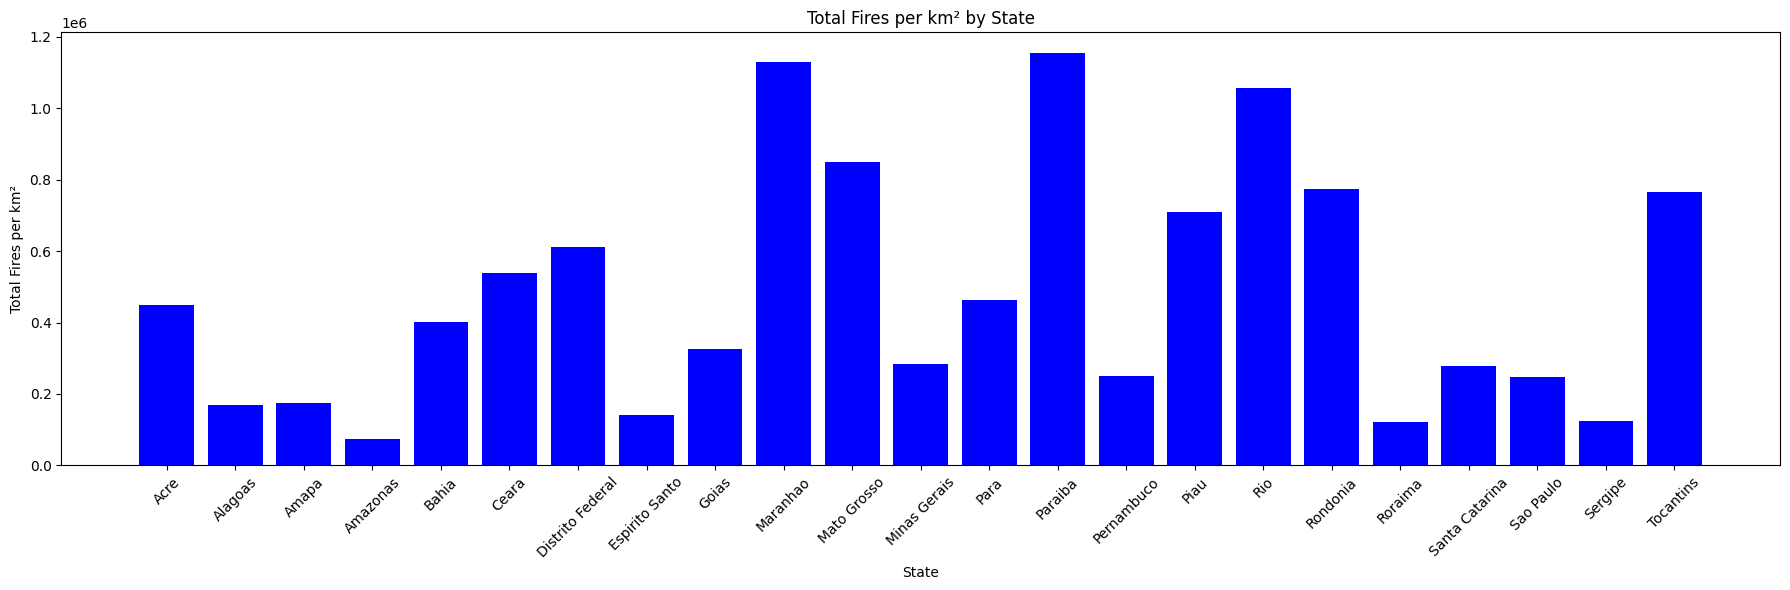

In [59]:
# Create a bar plot
plt.figure(figsize=(18, 6))
plt.bar(state_summary['state'], state_summary['total_fires_per_km2'], color='blue')
plt.xlabel('State')
plt.ylabel('Total Fires per km²')
plt.title('Total Fires per km² by State')
plt.xticks(rotation=45)  # Rotate state names for readability
plt.tight_layout()

# Show the plot
plt.show()

Although varying in size, Maranhao, Paraiba, and Rio de Janeiro have the highest density of fires.